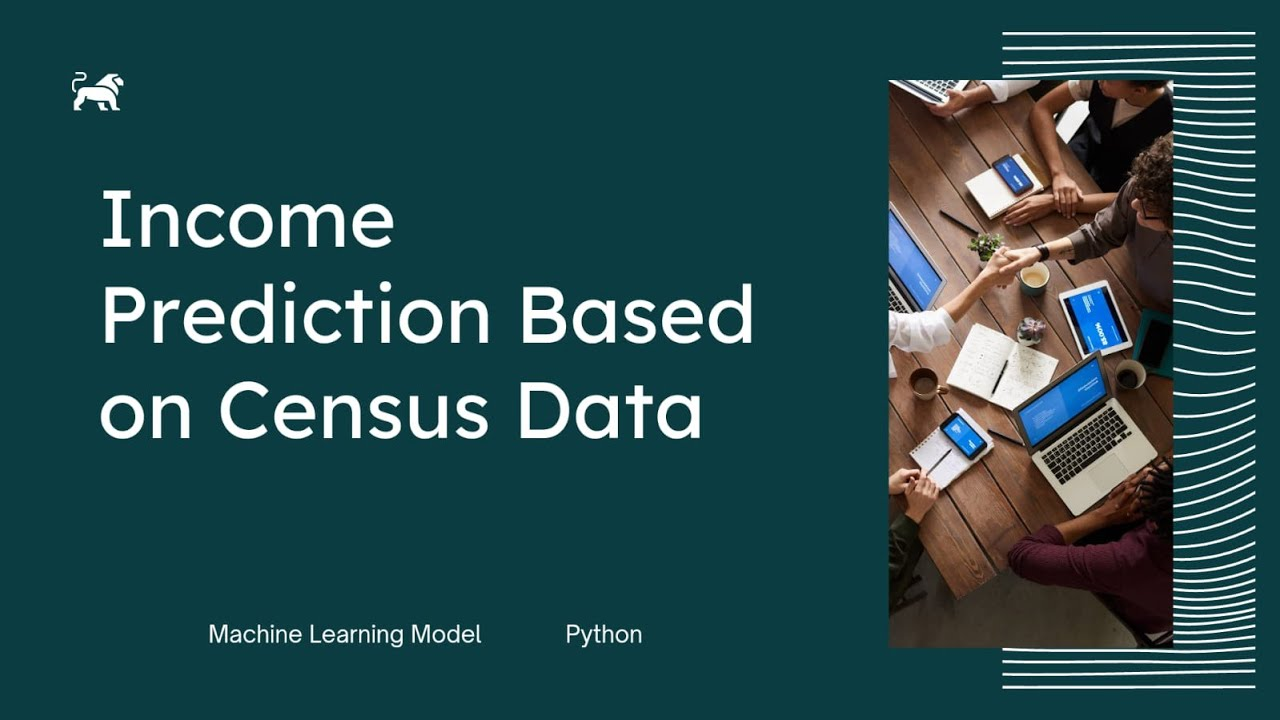

# PROBLEM STATEMENT : 

## INCOME PREDICTION FOR US CENSUS TRACT DATA
### Objective is to predict the income on a US census data with respect to factors like Total Population, Percentage of the white people etc. This is done in two ways :
##### 1. County-Wise
##### 2. Tract_Wise (Within each county)

# DATA DESCRIPTION :
#### 1. Data is collected from Kaggle. Dataset link is given below :
https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data?select=acs2017_census_tract_data.csv
#### 2. This is a census data of the United States for the year 2017. It contains information of all the states including DC and Puerto Rico and every state's corresponding counties. Every county is further divided into tracts. Tracts are small, relatively permanent statistical subdivisions of a county.
#### 3. The data consists of various attributes such as total population, percentages of white, hispanic, native people, no. of voting age citizens, number of employed people etc. These attributes are available for each census tract.

# METHODOLOGY :
## The project is broadly divided into 2 steps :
#### 1. Grouping the data county-wise, that is, adding all the census tract data of a county to obtain the data for a single county. Then the data set is divided into 3 parts :
    1. Counties having low total population, low percentage of white people and low average income
    2. Counties having high total population, high percentage of white people and high average       income
    3. Counties having medium total population, medium percentage of white people and medium         average income
#### 2. Keeping the data as it is, and then dividing into 3 parts :
    1. Tracts having low total population, low percentage of white people and low average income
    2. Tracts having high total population, high percentage of white people and high average       income
    3. Tracts having medium total population, medium percentage of white people and medium average income
##### NOTE : The threshold for deciding high, low and medium is decided by the 1st (low) and 3rd quartile (high) of all the 3 attributes on basis of which the data is divided.
#### 3. For tract datasets, the stochastic gradient decent algorithms are applied and their performances are checked. 4 optimizers (other than vanilla SGD) have been applied :
    1. SGD (Minibatching)
    2. Adam
    3. Adagrad
    4. RMSProp

# MAJOR FINDINGS :
#### 1. In county-wise income prediction, the highest r2 score has come out for counties having low total population, low percentage of white people and low average income. That is, income can be predicted the best for the above category. 
#### 2. While preparing the dataset county-wise, it is observed that the dataset gets reduced a lot, in terms of no. of data points. Further, when the dataset is divided into 3 parts, many data points are lost and the data is further reduced to an amount where the Stochastic Gradient Descent algorithms are not suitable to apply.
#### Hence, we go to our second approach, which is dividing the original dataset into 3 parts.
#### 3. In tract-wise income prediction, the highest r2 score has come out for tracts having high total population, high percentage of white people and high average income. That is, income can be predicted the best for the above category.
#### 4. For each of the 3 categories (low, medium and high), GD runs the best since data points are low. For SGD, the validation loss is not decreasing and keeps oscillating.
#### 5. For each of the 3 categories (low, medium and high), SGD (Minibatching), Adam, Adagrad and RMSProp have performed equally well, i.e., both training loss and validation loss have converged and saturated.

## Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
np.random.seed(1234)

In [2]:
data = pd.read_csv("acs2017_census_tract_data.csv")
data

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


# DATA PREPROCESSING :
###### 1. Using first quartile and third quartile of TotalPop, White and Income attributes, the dataset is divided by indexing.
##### 2. Some of the attributes are converted into percentages, to match with the other attributes.
##### 3. Correlation matrix is computed for all the attributes except income. The attributes having correlation greater than 0.8 are removed as it will be affecting the prediction of the income.

# PART 1 : FOR COUNTY-WISE DATA :

#### ADDING ROWS COUNTY-WISE

In [3]:
data_county = data.groupby("County").sum()
data_county

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
County,,,,,,,,,,,,,,,,,,,,,
Abbeville County,270011702100,24788,12044,12744,7.8,422.9,154.8,0.6,1.7,0.0,...,9.7,12.5,31.6,158.7,9505,468.2,83.8,47.3,0.7,56.3
Acadia Parish,264023527800,62607,30433,32174,30.0,931.1,211.6,0.7,1.3,0.4,...,19.9,28.6,28.7,323.8,24982,966.1,147.9,83.3,2.6,108.9
Accomack County,612016664200,32840,16079,16761,62.7,508.2,206.1,2.8,7.4,0.0,...,21.3,16.2,38.3,176.0,13837,589.7,143.2,65.5,1.7,43.6
Ada County,944059250831,435117,217999,217118,482.2,4984.5,78.6,30.6,153.9,6.3,...,110.4,189.0,394.0,1158.9,214984,4594.8,886.6,410.6,7.8,273.4
Adair County,607040210503,74069,36184,37885,66.0,1796.8,36.4,204.1,20.2,2.1,...,82.7,30.5,84.2,460.9,31072,1637.0,381.3,175.7,5.7,124.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yukon-Koyukuk Census Area,9160001000,5453,2936,2517,9.0,85.8,0.5,279.4,3.0,0.0,...,159.9,79.6,33.5,32.7,2082,150.7,229.5,19.9,0.0,78.4
Yuma County,237741177039,214390,109924,104466,3032.0,2146.5,97.3,71.9,60.9,4.7,...,161.5,100.2,211.4,1029.0,79831,3950.0,1140.6,298.2,11.3,542.1
Zapata County,145517851003,14415,7190,7225,282.1,16.2,0.0,0.0,1.7,0.0,...,12.7,2.0,5.2,53.7,5146,196.5,64.6,37.7,1.2,35.5


In [4]:
data_county = data_county.drop("TractId", axis = 1)

#### CHECKING THE FIRST AND THIRD QUARTILES AND DIVIDING INTO 3 DATAFRAMES:

In [5]:
data_county["TotalPop"].describe()

count    1.955000e+03
mean     1.659710e+05
std      4.621300e+05
min      7.400000e+01
25%      1.435750e+04
50%      3.782500e+04
75%      1.177355e+05
max      1.010572e+07
Name: TotalPop, dtype: float64

In [6]:
data_county["White"].describe()

count     1955.000000
mean      2298.853913
std       5125.570271
min          0.000000
25%        251.250000
50%        654.900000
75%       1948.750000
max      63237.300000
Name: White, dtype: float64

In [7]:
data_county["Income"].describe()

count    1.955000e+03
mean     2.277398e+06
std      6.850551e+06
min      2.335500e+04
25%      1.633470e+05
50%      4.004710e+05
75%      1.408424e+06
max      1.522534e+08
Name: Income, dtype: float64

# Counties having low population, low income and low white percentage:

In [8]:
a1 = np.logical_and(data_county["TotalPop"] < 1.435750e+04, data_county["White"] < 251.250000)
a2 = np.logical_and(data_county["Income"] < 1.633470e+05, a1); a2

County
Abbeville County             False
Acadia Parish                False
Accomack County              False
Ada County                   False
Adair County                 False
                             ...  
Yukon-Koyukuk Census Area     True
Yuma County                  False
Zapata County                False
Zavala County                 True
Ziebach County                True
Length: 1955, dtype: bool

In [9]:
low_data_county = data_county[a2]
low_data_county

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
County,,,,,,,,,,,,,,,,,,,,,
Aleutians East Borough,3338,2049,1289,9.7,15.5,4.8,37.4,26.1,1.4,2057,...,59.2,3.3,5.3,5.1,2405,70.9,21.0,8.1,0.1,2.4
Aleutians West Census Area,5784,3539,2245,24.1,46.6,8.2,54.4,50.2,7.0,3565,...,78.8,12.3,2.7,14.9,3961,126.6,66.5,6.7,0.0,5.1
Alger County,9254,5088,4166,4.2,251.2,23.1,9.9,0.3,0.0,7779,...,11.3,5.1,23.2,68.4,3160,228.4,54.4,17.1,0.0,22.4
Allendale County,9402,4952,4450,14.3,77.6,205.5,1.0,0.0,0.3,7492,...,8.6,2.2,3.2,82.3,2668,224.6,60.8,14.6,0.0,36.9
Alpine County,1203,664,539,9.7,64.6,1.5,20.6,0.7,0.0,936,...,9.1,1.6,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yalobusha County,12426,6101,6325,3.8,176.6,118.3,0.5,0.4,0.0,9537,...,1.2,1.1,0.6,77.2,5274,229.8,57.3,12.8,0.0,16.6
Yoakum County,8481,4286,4195,122.9,74.6,0.0,0.2,0.2,0.0,4432,...,12.9,0.7,2.7,32.9,3755,138.6,38.2,22.9,0.3,13.7
Yukon-Koyukuk Census Area,5453,2936,2517,9.0,85.8,0.5,279.4,3.0,0.0,3900,...,159.9,79.6,33.5,32.7,2082,150.7,229.5,19.9,0.0,78.4


#### CONVERSION TO PERCENTAGE :

In [10]:
to_percent=['Men','Women','VotingAgeCitizen','Employed']
low_data_county[to_percent] = low_data_county[to_percent].div(low_data_county["TotalPop"], axis="index")*100

to_perc_emp = ['PrivateWork','PublicWork','SelfEmployed','FamilyWork']
low_data_county[to_perc_emp] = low_data_county[to_perc_emp].multiply(low_data_county["Employed"], axis="index")/100

C:\Users\RAKTIMA\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
cols = list(low_data_county.columns.values)
cols.pop(cols.index('Income')) 
low_data_county = low_data_county[cols+['Income']]
low_data_county

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
County,,,,,,,,,,,,,,,,,,,,,
Aleutians East Borough,3338,61.384062,38.615938,9.7,15.5,4.8,37.4,26.1,1.4,61.623727,...,3.3,5.3,5.1,72.049131,51.082834,15.130318,5.835980,0.072049,2.4,66607.0
Aleutians West Census Area,5784,61.186030,38.813970,24.1,46.6,8.2,54.4,50.2,7.0,61.635546,...,12.3,2.7,14.9,68.482019,86.698237,45.540543,4.588295,0.000000,5.1,153718.0
Alger County,9254,54.981630,45.018370,4.2,251.2,23.1,9.9,0.3,0.0,84.060947,...,5.1,23.2,68.4,34.147396,77.992652,18.576183,5.839205,0.000000,22.4,134672.0
Allendale County,9402,52.669645,47.330355,14.3,77.6,205.5,1.0,0.0,0.3,79.685173,...,2.2,3.2,82.3,28.376941,63.734610,17.253180,4.143033,0.000000,36.9,81816.0
Alpine County,1203,55.195345,44.804655,9.7,64.6,1.5,20.6,0.7,0.0,77.805486,...,1.6,14.0,21.9,31.088944,18.218121,9.388861,3.481962,0.000000,14.6,63438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yalobusha County,12426,49.098664,50.901336,3.8,176.6,118.3,0.5,0.4,0.0,76.750362,...,1.1,0.6,77.2,42.443264,97.534621,24.319990,5.432738,0.000000,16.6,113736.0
Yoakum County,8481,50.536493,49.463507,122.9,74.6,0.0,0.2,0.2,0.0,52.257988,...,0.7,2.7,32.9,44.275439,61.365759,16.913218,10.139076,0.132826,13.7,121625.0
Yukon-Koyukuk Census Area,5453,53.841922,46.158078,9.0,85.8,0.5,279.4,3.0,0.0,71.520264,...,79.6,33.5,32.7,38.180818,57.538493,87.624977,7.597983,0.000000,78.4,152225.0


#### CALCULATING THE CORRELATION :

In [12]:
low_data_county_wi = low_data_county.drop("Income", axis = 1)

In [13]:
low_data_county_wi_corr = low_data_county_wi.corr()
low_data_county_wi_corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,-0.015147,0.015147,0.272013,0.386364,0.436058,0.132793,0.028596,-0.058036,-0.074934,...,0.023349,0.213296,0.019424,0.748749,-0.437959,0.634778,0.409034,-0.019640,0.011361,0.566687
Men,-0.015147,1.000000,-1.000000,-0.035787,-0.151441,-0.071877,0.097898,0.180472,0.020436,-0.041336,...,0.190781,0.070251,-0.087441,-0.173196,-0.060913,-0.155284,-0.019596,-0.168862,-0.070974,-0.071504
Women,0.015147,-1.000000,1.000000,0.035787,0.151441,0.071877,-0.097898,-0.180472,-0.020436,0.041336,...,-0.190781,-0.070251,0.087441,0.173196,0.060913,0.155284,0.019596,0.168862,0.070974,0.071504
Hispanic,0.272013,-0.035787,0.035787,1.000000,-0.278763,-0.117702,-0.097888,-0.035997,-0.031561,-0.322699,...,-0.020482,0.054290,-0.006820,0.199437,-0.298887,0.152083,0.134452,-0.004255,-0.022767,0.264519
White,0.386364,-0.151441,0.151441,-0.278763,1.000000,0.083365,-0.141744,-0.096127,-0.091904,0.251111,...,-0.115783,-0.104897,0.299486,0.521967,0.092303,0.697380,0.215067,0.486712,0.225168,0.031768
Black,0.436058,-0.071877,0.071877,-0.117702,0.083365,1.000000,-0.102421,-0.009548,-0.037617,0.110070,...,-0.093527,0.069385,-0.190262,0.552323,-0.332975,0.393614,0.206633,-0.155112,-0.063024,0.550053
Native,0.132793,0.097898,-0.097898,-0.097888,-0.141744,-0.102421,1.000000,0.154799,0.046934,-0.200525,...,0.707927,0.648634,0.259326,-0.051842,-0.114071,-0.031450,0.637204,-0.038739,-0.034016,0.430077
Asian,0.028596,0.180472,-0.180472,-0.035997,-0.096127,-0.009548,0.154799,1.000000,0.569762,-0.046674,...,0.413428,0.182519,-0.037460,-0.088218,0.312742,0.116624,0.326115,-0.061767,-0.031772,-0.006317
Pacific,-0.058036,0.020436,-0.020436,-0.031561,-0.091904,-0.037617,0.046934,0.569762,1.000000,0.154661,...,0.207070,0.090565,-0.036850,-0.097582,0.239039,-0.025278,0.260881,-0.078084,-0.039750,-0.038442
VotingAgeCitizen,-0.074934,-0.041336,0.041336,-0.322699,0.251111,0.110070,-0.200525,-0.046674,0.154661,1.000000,...,-0.077453,-0.150916,0.065065,0.091981,0.083329,-0.042139,-0.029201,0.059869,0.027221,-0.066349


In [14]:
upper_triangular_l = low_data_county_wi_corr.where(np.triu(np.ones(low_data_county_wi_corr.shape),k=1).astype(np.bool))
print(upper_triangular_l)

                  TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop               NaN -0.015147  0.015147  0.272013  0.386364  0.436058   
Men                    NaN       NaN -1.000000 -0.035787 -0.151441 -0.071877   
Women                  NaN       NaN       NaN  0.035787  0.151441  0.071877   
Hispanic               NaN       NaN       NaN       NaN -0.278763 -0.117702   
White                  NaN       NaN       NaN       NaN       NaN  0.083365   
Black                  NaN       NaN       NaN       NaN       NaN       NaN   
Native                 NaN       NaN       NaN       NaN       NaN       NaN   
Asian                  NaN       NaN       NaN       NaN       NaN       NaN   
Pacific                NaN       NaN       NaN       NaN       NaN       NaN   
VotingAgeCitizen       NaN       NaN       NaN       NaN       NaN       NaN   
IncomeErr              NaN       NaN       NaN       NaN       NaN       NaN   
IncomePerCap           NaN       NaN    

<ipython-input-14-91c166b7b95b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular_l = low_data_county_wi_corr.where(np.triu(np.ones(low_data_county_wi_corr.shape),k=1).astype(np.bool))


#### CHECKING AND REMOVING THE COLUMNS HAVING CORRELATION > 0.8 :

In [15]:
drop_col_l = [column for column in upper_triangular_l.columns if any(upper_triangular_l[column] > 0.8)]
print(drop_col_l)

['ChildPoverty', 'Service', 'Drive', 'MeanCommute', 'PrivateWork']


In [16]:
data_l_cl = low_data_county.drop(drop_col_l, axis = 1)
data_l_cl

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Transit,Walk,OtherTransp,WorkAtHome,Employed,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
County,,,,,,,,,,,,,,,,,,,,,
Aleutians East Borough,3338,61.384062,38.615938,9.7,15.5,4.8,37.4,26.1,1.4,61.623727,...,0.1,59.2,3.3,5.3,72.049131,15.130318,5.835980,0.072049,2.4,66607.0
Aleutians West Census Area,5784,61.186030,38.813970,24.1,46.6,8.2,54.4,50.2,7.0,61.635546,...,0.2,78.8,12.3,2.7,68.482019,45.540543,4.588295,0.000000,5.1,153718.0
Alger County,9254,54.981630,45.018370,4.2,251.2,23.1,9.9,0.3,0.0,84.060947,...,4.7,11.3,5.1,23.2,34.147396,18.576183,5.839205,0.000000,22.4,134672.0
Allendale County,9402,52.669645,47.330355,14.3,77.6,205.5,1.0,0.0,0.3,79.685173,...,4.3,8.6,2.2,3.2,28.376941,17.253180,4.143033,0.000000,36.9,81816.0
Alpine County,1203,55.195345,44.804655,9.7,64.6,1.5,20.6,0.7,0.0,77.805486,...,0.0,9.1,1.6,14.0,31.088944,9.388861,3.481962,0.000000,14.6,63438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yalobusha County,12426,49.098664,50.901336,3.8,176.6,118.3,0.5,0.4,0.0,76.750362,...,0.1,1.2,1.1,0.6,42.443264,24.319990,5.432738,0.000000,16.6,113736.0
Yoakum County,8481,50.536493,49.463507,122.9,74.6,0.0,0.2,0.2,0.0,52.257988,...,0.0,12.9,0.7,2.7,44.275439,16.913218,10.139076,0.132826,13.7,121625.0
Yukon-Koyukuk Census Area,5453,53.841922,46.158078,9.0,85.8,0.5,279.4,3.0,0.0,71.520264,...,1.4,159.9,79.6,33.5,38.180818,87.624977,7.597983,0.000000,78.4,152225.0


#### STANDARDIZING THE DATA:

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(data_l_cl.iloc[:,3:-1].values)
y = scaler.fit_transform(data_l_cl[['Income']])
y = np.array(y)
y = y.reshape((337,))

print(X.shape, y.shape)

(337, 25) (337,)


#### TRAIN-TEST SPLITTING :

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.20)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(X_test.shape)
print(y_test.shape)

X_train:(269, 25)
y_train:(269,)
(68, 25)
(68,)


In [19]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              87.94
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                   3.38e-107
Time:                        13:15:09   Log-Likelihood:                         -66.011
No. Observations:                 269   AIC:                                      182.0
Df Residuals:                     244   BIC:                                      271.9
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### APPLYING THE LINEAR REGRESSION MODEL AND CALCULATING THE TEST AND TRAIN r2 SCORES:

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train  =  model.predict(X_train)
mean_squared_error(y_test, y_pred_test), mean_absolute_error(y_test, y_pred_test) 
train_score_l = r2_score(y_train, y_pred_train)
test_score_l = r2_score(y_test, y_pred_test)
train_score_l, test_score_l

(0.9000980290941794, 0.8968364496701617)

## Counties having high population, high income and high white percentage

In [21]:
a3 = np.logical_and(data_county["TotalPop"] > 1.177355e+05, data_county["White"] > 1948.750000)
a4 = np.logical_and(data_county["Income"] > 1.408424e+06, a3); a4

County
Abbeville County             False
Acadia Parish                False
Accomack County              False
Ada County                    True
Adair County                 False
                             ...  
Yukon-Koyukuk Census Area    False
Yuma County                   True
Zapata County                False
Zavala County                False
Ziebach County               False
Length: 1955, dtype: bool

In [22]:
high_data_county = data_county[a4]
high_data_county

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
County,,,,,,,,,,,,,,,,,,,,,
Ada County,435117,217999,217118,482.2,4984.5,78.6,30.6,153.9,6.3,316189,...,110.4,189.0,394.0,1158.9,214984,4594.8,886.6,410.6,7.8,273.4
Adams County,831788,417154,414634,4475.6,12210.4,960.8,68.2,444.9,12.0,560280,...,407.1,233.4,885.7,4764.1,400309,15221.8,2144.7,1102.9,30.4,1057.5
Aiken County,165707,80260,85447,169.5,2170.9,755.4,8.0,28.7,1.6,124553,...,33.4,29.4,92.4,801.3,70753,2497.5,516.8,172.5,13.5,292.2
Alachua County,259865,125712,134153,511.8,3441.2,1156.7,17.1,321.8,3.4,200490,...,262.5,281.3,257.5,1154.3,120466,3888.6,1463.4,242.5,5.2,407.3
Alamance County,157844,75078,82766,409.4,2433.5,621.8,10.2,50.4,1.5,113344,...,42.5,41.0,104.9,847.3,73906,2909.2,473.6,211.2,5.9,210.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yavapai County,220972,108100,112872,596.5,3414.2,21.2,53.0,33.7,0.6,176240,...,142.1,100.9,319.0,970.4,83535,3203.8,599.1,391.6,5.4,293.3
Yellowstone County,156332,76868,79464,174.5,2778.3,21.1,129.0,17.4,3.6,117966,...,90.9,41.7,133.0,574.1,80238,2618.5,336.8,239.3,5.2,117.7
Yolo County,212605,103617,108988,1235.7,2009.3,87.6,10.1,548.6,14.3,142947,...,138.1,420.1,212.5,939.9,95944,2702.4,1143.2,252.6,2.2,291.2


#### CONVERSION TO PERCENTAGE :

In [23]:
to_percent=['Men','Women', 'VotingAgeCitizen','Employed']
high_data_county[to_percent] = high_data_county[to_percent].div(high_data_county["TotalPop"], axis="index")*100

to_perc_emp = ['PrivateWork','PublicWork','SelfEmployed','FamilyWork']
high_data_county[to_perc_emp] = high_data_county[to_perc_emp].multiply(high_data_county["Employed"], axis="index")/100

C:\Users\RAKTIMA\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
cols = list(high_data_county.columns.values)
cols.pop(cols.index('Income')) 
high_data_county = high_data_county[cols+['Income']]
high_data_county

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
County,,,,,,,,,,,,,,,,,,,,,
Ada County,435117,50.101237,49.898763,482.2,4984.5,78.6,30.6,153.9,6.3,72.667581,...,189.0,394.0,1158.9,49.408320,2270.213490,438.054166,202.870562,3.853849,273.4,3669479.0
Adams County,831788,50.151481,49.848519,4475.6,12210.4,960.8,68.2,444.9,12.0,67.358510,...,233.4,885.7,4764.1,48.126325,7325.693009,1032.165302,530.785243,14.630403,1057.5,10720580.0
Aiken County,165707,48.434888,51.565112,169.5,2170.9,755.4,8.0,28.7,1.6,75.164598,...,29.4,92.4,801.3,42.697653,1066.373886,220.661471,73.653452,5.764183,292.2,1562607.0
Alachua County,259865,48.375887,51.624113,511.8,3441.2,1156.7,17.1,321.8,3.4,77.151598,...,281.3,257.5,1154.3,46.357147,1802.644017,678.390489,112.416081,2.410572,407.3,2594751.0
Alamance County,157844,47.564684,52.435316,409.4,2433.5,621.8,10.2,50.4,1.5,71.807608,...,41.0,104.9,847.3,46.822179,1362.150827,221.749839,98.888442,2.762509,210.1,1694961.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yavapai County,220972,48.920225,51.079775,596.5,3414.2,21.2,53.0,33.7,0.6,79.756711,...,100.9,319.0,970.4,37.803432,1211.146358,226.480362,148.038240,2.041385,293.3,2012154.0
Yellowstone County,156332,49.169716,50.830284,174.5,2778.3,21.1,129.0,17.4,3.6,75.458639,...,41.7,133.0,574.1,51.325384,1343.955192,172.863895,122.821645,2.668920,117.7,1867226.0
Yolo County,212605,48.736859,51.263141,1235.7,2009.3,87.6,10.1,548.6,14.3,67.235954,...,420.1,212.5,939.9,45.127819,1219.534186,515.901229,113.992871,0.992812,291.2,2719439.0


#### CALCULATING THE CORRELATION :

In [25]:
high_data_county_wi = high_data_county.drop("Income", axis = 1)

In [26]:
high_data_county_wi_corr = high_data_county_wi.corr()
high_data_county_wi_corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,-0.095796,0.095796,0.871423,0.878827,0.693951,0.429820,0.800746,0.325991,-0.401879,...,0.771119,0.923553,0.969135,0.964434,0.096397,0.983456,0.953584,0.955499,0.972160,0.931822
Men,-0.095796,1.000000,-1.000000,-0.014371,-0.122667,-0.323492,0.059265,-0.020502,0.115533,-0.121133,...,-0.191838,-0.091437,-0.098336,-0.139865,-0.096518,-0.135106,-0.123340,-0.072757,-0.093098,-0.162443
Women,0.095796,-1.000000,1.000000,0.014371,0.122667,0.323492,-0.059265,0.020502,-0.115533,0.121133,...,0.191838,0.091437,0.098336,0.139865,0.096518,0.135106,0.123340,0.072757,0.093098,0.162443
Hispanic,0.871423,-0.014371,0.014371,1.000000,0.579937,0.487880,0.377540,0.805585,0.304279,-0.437189,...,0.653248,0.844401,0.857106,0.863290,0.004669,0.836413,0.794481,0.924330,0.849104,0.824785
White,0.878827,-0.122667,0.122667,0.579937,1.000000,0.672044,0.451766,0.579567,0.226460,-0.190301,...,0.688959,0.783253,0.869603,0.840158,0.122708,0.905739,0.882395,0.791873,0.873702,0.837373
Black,0.693951,-0.323492,0.323492,0.487880,0.672044,1.000000,0.201903,0.456512,0.083548,-0.231834,...,0.720475,0.693577,0.647145,0.765738,0.020099,0.754118,0.751698,0.603608,0.683545,0.833372
Native,0.429820,0.059265,-0.059265,0.377540,0.451766,0.201903,1.000000,0.270715,0.169542,-0.163798,...,0.274720,0.431300,0.464147,0.389667,-0.066376,0.425612,0.422919,0.416208,0.428216,0.395382
Asian,0.800746,-0.020502,0.020502,0.805585,0.579567,0.456512,0.270715,1.000000,0.489270,-0.366121,...,0.723358,0.823416,0.803239,0.840346,0.137644,0.800738,0.792400,0.867373,0.792461,0.740273
Pacific,0.325991,0.115533,-0.115533,0.304279,0.226460,0.083548,0.169542,0.489270,1.000000,-0.164268,...,0.267044,0.379373,0.332009,0.302682,0.025182,0.302526,0.354634,0.345340,0.326088,0.270304
VotingAgeCitizen,-0.401879,-0.121133,0.121133,-0.437189,-0.190301,-0.231834,-0.163798,-0.366121,-0.164268,1.000000,...,-0.262268,-0.350087,-0.346863,-0.372275,-0.130198,-0.349965,-0.347447,-0.340781,-0.344157,-0.314316


In [27]:
upper_triangular_h = high_data_county_wi_corr.where(np.triu(np.ones(high_data_county_wi_corr.shape),k=1).astype(np.bool))
print(upper_triangular_h)

                  TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop               NaN -0.095796  0.095796  0.871423  0.878827  0.693951   
Men                    NaN       NaN -1.000000 -0.014371 -0.122667 -0.323492   
Women                  NaN       NaN       NaN  0.014371  0.122667  0.323492   
Hispanic               NaN       NaN       NaN       NaN  0.579937  0.487880   
White                  NaN       NaN       NaN       NaN       NaN  0.672044   
Black                  NaN       NaN       NaN       NaN       NaN       NaN   
Native                 NaN       NaN       NaN       NaN       NaN       NaN   
Asian                  NaN       NaN       NaN       NaN       NaN       NaN   
Pacific                NaN       NaN       NaN       NaN       NaN       NaN   
VotingAgeCitizen       NaN       NaN       NaN       NaN       NaN       NaN   
IncomeErr              NaN       NaN       NaN       NaN       NaN       NaN   
IncomePerCap           NaN       NaN    

<ipython-input-27-b8c1e1231b6d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular_h = high_data_county_wi_corr.where(np.triu(np.ones(high_data_county_wi_corr.shape),k=1).astype(np.bool))


#### CHECKING AND REMOVING THE COLUMNS HAVING CORRELATION > 0.8 :

In [28]:
drop_col_h = [column for column in upper_triangular_h.columns if any(upper_triangular_h[column] > 0.8)]
print(drop_col_h)

['Hispanic', 'White', 'Asian', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


In [29]:
data_h_cl = high_data_county.drop(drop_col_h, axis = 1)
data_h_cl

,TotalPop,Men,Women,Black,Native,Pacific,VotingAgeCitizen,Transit,Employed,Income
County,,,,,,,,,,
Ada County,435117,50.101237,49.898763,78.6,30.6,6.3,72.667581,29.2,49.408320,3669479.0
Adams County,831788,50.151481,49.848519,960.8,68.2,12.0,67.358510,424.0,48.126325,10720580.0
Aiken County,165707,48.434888,51.565112,755.4,8.0,1.6,75.164598,6.2,42.697653,1562607.0
Alachua County,259865,48.375887,51.624113,1156.7,17.1,3.4,77.151598,273.4,46.357147,2594751.0
Alamance County,157844,47.564684,52.435316,621.8,10.2,1.5,71.807608,6.7,46.822179,1694961.0
...,...,...,...,...,...,...,...,...,...,...
Yavapai County,220972,48.920225,51.079775,21.2,53.0,0.6,79.756711,12.3,37.803432,2012154.0
Yellowstone County,156332,49.169716,50.830284,21.1,129.0,3.6,75.458639,25.5,51.325384,1867226.0
Yolo County,212605,48.736859,51.263141,87.6,10.1,14.3,67.235954,164.4,45.127819,2719439.0


#### STANDARDIZING THE DATA :

In [30]:
scaler = StandardScaler()
X1 = scaler.fit_transform(data_h_cl.iloc[:,3:-1].values)
y1 = scaler.fit_transform(data_h_cl[['Income']])
y1 = np.array(y1)
y1 = y1.reshape((433,))

print(X1.shape, y1.shape)

(433, 6) (433,)


#### TRAIN-TEST SPLITTING :

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)
# print train and test set shapes
print(f"X_train:{X1_train.shape}\ny_train:{y1_train.shape}")
print(X1_test.shape)
print(y1_test.shape)

X_train:(346, 6)
y_train:(346,)
(87, 6)
(87,)


In [32]:
res1 = sm.OLS(y1_train, X1_train).fit()
print(res1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              121.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    1.59e-81
Time:                        13:15:09   Log-Likelihood:                         -291.64
No. Observations:                 346   AIC:                                      595.3
Df Residuals:                     340   BIC:                                      618.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### APPLYING THE LINEAR REGRESSION MODEL AND CALCULATING THE TEST AND TRAIN r2 SCORES:

In [33]:
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred_test = model.predict(X1_test)
y1_pred_train  =  model.predict(X1_train)
mean_squared_error(y1_test, y1_pred_test), mean_absolute_error(y1_test, y1_pred_test) 
train_score_h = r2_score(y1_train, y1_pred_train)
test_score_h = r2_score(y1_test, y1_pred_test)
train_score_h, test_score_h

(0.6827384516844075, 0.5550070547597575)

## Counties having medium population, medium income and medium white percentage

In [34]:
a5 = np.logical_and(data_county["TotalPop"] >= 1.435750e+04, data_county["TotalPop"] <= 1.177355e+05) 
a6 = np.logical_and(data_county["White"] >= 251.250000, data_county["White"] <= 1948.750000)
a7 = np.logical_and(data_county["Income"] >= 1.633470e+05, data_county["Income"] <= 1.408424e+06)

In [35]:
data_county1 = data_county[a5]
data_county2 = data_county1[a6]
data_county3 = data_county2[a7]
data_county3

<ipython-input-35-c0bea2ab9832>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_county2 = data_county1[a6]
<ipython-input-35-c0bea2ab9832>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_county3 = data_county2[a7]


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
County,,,,,,,,,,,,,,,,,,,,,
Abbeville County,24788,12044,12744,7.8,422.9,154.8,0.6,1.7,0.0,19452,...,9.7,12.5,31.6,158.7,9505,468.2,83.8,47.3,0.7,56.3
Acadia Parish,62607,30433,32174,30.0,931.1,211.6,0.7,1.3,0.4,45197,...,19.9,28.6,28.7,323.8,24982,966.1,147.9,83.3,2.6,108.9
Accomack County,32840,16079,16761,62.7,508.2,206.1,2.8,7.4,0.0,24408,...,21.3,16.2,38.3,176.0,13837,589.7,143.2,65.5,1.7,43.6
Adair County,74069,36184,37885,66.0,1796.8,36.4,204.1,20.2,2.1,57071,...,82.7,30.5,84.2,460.9,31072,1637.0,381.3,175.7,5.7,124.2
Addison County,36825,18214,18611,19.5,935.9,8.3,2.7,17.1,0.0,29510,...,77.3,11.4,93.0,237.8,19872,778.3,103.3,115.9,2.5,45.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yankton County,22660,11786,10874,17.7,448.3,8.5,11.9,2.9,0.6,17661,...,13.6,3.9,22.3,77.0,11340,394.0,73.7,30.9,1.4,15.7
Yates County,25083,12069,13014,10.8,473.6,5.2,0.5,4.2,0.0,19160,...,44.5,20.9,49.7,110.9,11331,369.5,60.8,63.3,6.3,28.1
Yell County,21601,10722,10879,122.0,450.1,11.8,3.8,9.7,0.0,14691,...,13.6,14.2,40.9,122.9,8852,463.5,88.1,46.3,2.2,38.1


In [36]:
med_data_county = data_county3

#### CONVERSION TO PERCENTAGES :

In [37]:
to_percent=['Men','Women', 'VotingAgeCitizen','Employed']
med_data_county[to_percent] = med_data_county[to_percent].div(med_data_county["TotalPop"], axis="index")*100

to_perc_emp = ['PrivateWork','PublicWork','SelfEmployed','FamilyWork']
med_data_county[to_perc_emp] = med_data_county[to_perc_emp].multiply(med_data_county["Employed"], axis="index")/100

C:\Users\RAKTIMA\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
cols = list(med_data_county.columns.values)
cols.pop(cols.index('Income')) 
med_data_county = med_data_county[cols+['Income']]
med_data_county

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
County,,,,,,,,,,,,,,,,,,,,,
Abbeville County,24788,48.588026,51.411974,7.8,422.9,154.8,0.6,1.7,0.0,78.473455,...,12.5,31.6,158.7,38.345167,179.532072,32.133250,18.137264,0.268416,56.3,214406.0
Acadia Parish,62607,48.609580,51.390420,30.0,931.1,211.6,0.7,1.3,0.4,72.191608,...,28.6,28.7,323.8,39.902886,385.501784,59.016369,33.239104,1.037475,108.9,514376.0
Accomack County,32840,48.961632,51.038368,62.7,508.2,206.1,2.8,7.4,0.0,74.323995,...,16.2,38.3,176.0,42.134592,248.467689,60.336736,27.598158,0.716288,43.6,332271.0
Adair County,74069,48.851746,51.148254,66.0,1796.8,36.4,204.1,20.2,2.1,77.051128,...,30.5,84.2,460.9,41.950074,686.722705,159.955631,73.706279,2.391154,124.2,797155.0
Addison County,36825,49.460964,50.539036,19.5,935.9,8.3,2.7,17.1,0.0,80.135777,...,11.4,93.0,237.8,53.963340,419.996676,55.744130,62.543511,1.349084,45.7,615443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yankton County,22660,52.012357,47.987643,17.7,448.3,8.5,11.9,2.9,0.6,77.939100,...,3.9,22.3,77.0,50.044131,197.173875,36.882524,15.463636,0.700618,15.7,265887.0
Yates County,25083,48.116254,51.883746,10.8,473.6,5.2,0.5,4.2,0.0,76.386397,...,20.9,49.7,110.9,45.174022,166.918012,27.465806,28.595156,2.845963,28.1,260192.0
Yell County,21601,49.636591,50.363409,122.0,450.1,11.8,3.8,9.7,0.0,68.010740,...,14.2,40.9,122.9,40.979584,189.940373,36.103014,18.973548,0.901551,38.1,234438.0


In [39]:
med_data_county_wi = med_data_county.drop("Income", axis = 1)

#### CALCULATING THE CORRELATION :

In [40]:
med_data_county_wi_corr = med_data_county_wi.corr()
med_data_county_wi_corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,-0.116893,0.116893,0.374431,0.808006,0.318694,0.159399,0.402395,0.113755,-0.141427,...,0.428600,0.608999,0.606808,0.864772,0.071028,0.886682,0.771998,0.661950,0.350863,0.691843
Men,-0.116893,1.000000,-1.000000,0.062141,-0.066136,-0.280208,0.035314,-0.009573,0.039740,0.008840,...,0.018089,-0.060707,0.010201,-0.138108,-0.092304,-0.162039,-0.010744,-0.083533,0.001377,-0.166912
Women,0.116893,-1.000000,1.000000,-0.062141,0.066136,0.280208,-0.035314,0.009573,-0.039740,-0.008840,...,-0.018089,0.060707,-0.010201,0.138108,0.092304,0.162039,0.010744,0.083533,-0.001377,0.166912
Hispanic,0.374431,0.062141,-0.062141,1.000000,0.110109,0.007023,0.104766,0.223721,0.084990,-0.537874,...,0.135171,0.222709,0.281292,0.292765,-0.041537,0.313381,0.338894,0.314827,0.182492,0.293634
White,0.808006,-0.066136,0.066136,0.110109,1.000000,0.039405,0.074548,0.263765,0.020913,0.149805,...,0.488095,0.522738,0.658688,0.810027,0.154283,0.898360,0.687372,0.758984,0.459903,0.562341
Black,0.318694,-0.280208,0.280208,0.007023,0.039405,1.000000,-0.059540,0.062000,-0.005006,-0.056607,...,0.040309,0.290855,-0.022662,0.392475,-0.262086,0.275119,0.327556,0.054380,-0.033553,0.558700
Native,0.159399,0.035314,-0.035314,0.104766,0.074548,-0.059540,1.000000,0.021305,0.036578,-0.088406,...,0.206057,0.223598,0.304706,0.198226,-0.164483,0.079312,0.342432,0.122485,0.119334,0.378961
Asian,0.402395,-0.009573,0.009573,0.223721,0.263765,0.062000,0.021305,1.000000,0.628733,-0.156879,...,0.463475,0.311551,0.364326,0.296672,0.151157,0.371113,0.396078,0.312636,0.155536,0.250848
Pacific,0.113755,0.039740,-0.039740,0.084990,0.020913,-0.005006,0.036578,0.628733,1.000000,-0.080314,...,0.091685,0.085730,0.139464,0.074493,0.014383,0.078619,0.127335,0.151735,0.041694,0.074874
VotingAgeCitizen,-0.141427,0.008840,-0.008840,-0.537874,0.149805,-0.056607,-0.088406,-0.156879,-0.080314,1.000000,...,0.103484,-0.045305,0.066617,-0.016403,-0.045417,-0.067510,-0.035365,0.018803,0.028151,-0.042404


In [41]:
upper_triangular_m = med_data_county_wi_corr.where(np.triu(np.ones(med_data_county_wi_corr.shape),k=1).astype(np.bool))
print(upper_triangular_m)

                  TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop               NaN -0.116893  0.116893  0.374431  0.808006  0.318694   
Men                    NaN       NaN -1.000000  0.062141 -0.066136 -0.280208   
Women                  NaN       NaN       NaN -0.062141  0.066136  0.280208   
Hispanic               NaN       NaN       NaN       NaN  0.110109  0.007023   
White                  NaN       NaN       NaN       NaN       NaN  0.039405   
Black                  NaN       NaN       NaN       NaN       NaN       NaN   
Native                 NaN       NaN       NaN       NaN       NaN       NaN   
Asian                  NaN       NaN       NaN       NaN       NaN       NaN   
Pacific                NaN       NaN       NaN       NaN       NaN       NaN   
VotingAgeCitizen       NaN       NaN       NaN       NaN       NaN       NaN   
IncomeErr              NaN       NaN       NaN       NaN       NaN       NaN   
IncomePerCap           NaN       NaN    

<ipython-input-41-ab7069326ca5>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular_m = med_data_county_wi_corr.where(np.triu(np.ones(med_data_county_wi_corr.shape),k=1).astype(np.bool))


#### CHECKING AND REMOVING COLUMNS HAVING CORRELATION > 0.8 :

In [42]:
drop_col_m = [column for column in upper_triangular_m.columns if any(upper_triangular_m[column] > 0.8)]
print(drop_col_m)

['White', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Drive', 'Carpool', 'MeanCommute', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'Unemployment']


In [43]:
data_m_cl = med_data_county.drop(drop_col_m, axis = 1)
data_m_cl

,TotalPop,Men,Women,Hispanic,Black,Native,Asian,Pacific,VotingAgeCitizen,Poverty,Production,Transit,Walk,OtherTransp,WorkAtHome,Employed,FamilyWork,Income
County,,,,,,,,,,,,,,,,,,
Abbeville County,24788,48.588026,51.411974,7.8,154.8,0.6,1.7,0.0,78.473455,133.1,124.6,2.7,9.7,12.5,31.6,38.345167,0.268416,214406.0
Acadia Parish,62607,48.609580,51.390420,30.0,211.6,0.7,1.3,0.4,72.191608,263.2,180.2,1.5,19.9,28.6,28.7,39.902886,1.037475,514376.0
Accomack County,32840,48.961632,51.038368,62.7,206.1,2.8,7.4,0.0,74.323995,160.9,132.5,4.3,21.3,16.2,38.3,42.134592,0.716288,332271.0
Adair County,74069,48.851746,51.148254,66.0,36.4,204.1,20.2,2.1,77.051128,570.0,428.5,1.8,82.7,30.5,84.2,41.950074,2.391154,797155.0
Addison County,36825,49.460964,50.539036,19.5,8.3,2.7,17.1,0.0,80.135777,81.2,115.4,7.5,77.3,11.4,93.0,53.963340,1.349084,615443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yankton County,22660,52.012357,47.987643,17.7,8.5,11.9,2.9,0.6,77.939100,60.2,84.5,3.8,13.6,3.9,22.3,50.044131,0.700618,265887.0
Yates County,25083,48.116254,51.883746,10.8,5.2,0.5,4.2,0.0,76.386397,64.3,74.3,1.6,44.5,20.9,49.7,45.174022,2.845963,260192.0
Yell County,21601,49.636591,50.363409,122.0,11.8,3.8,9.7,0.0,68.010740,110.8,141.4,3.6,13.6,14.2,40.9,40.979584,0.901551,234438.0


#### STANDARDIZING THE DATA :

In [44]:
scaler = StandardScaler()
X2 = scaler.fit_transform(data_m_cl.iloc[:,3:-1].values)
y2 = scaler.fit_transform(data_m_cl[['Income']])
y2 = np.array(y2)
y2 = y2.reshape((765,))

print(X2.shape, y2.shape)

(765, 14) (765,)


#### TRAIN-TEST SPLITTING :

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)
# print train and test set shapes
print(f"X_train:{X2_train.shape}\ny_train:{y2_train.shape}")
print(X2_test.shape)
print(y2_test.shape)

X_train:(612, 14)
y_train:(612,)
(153, 14)
(153,)


In [46]:
res2 = sm.OLS(y2_train, X2_train).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              171.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                   9.04e-199
Time:                        13:15:10   Log-Likelihood:                         -385.43
No. Observations:                 612   AIC:                                      798.9
Df Residuals:                     598   BIC:                                      860.7
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### APPLYING THE LINEAR REGRESSION MODEL AND CALCULATING THE TEST AND TRAIN r2 SCORES: 

In [47]:
model = LinearRegression()
model.fit(X2_train, y2_train)
y2_pred_test = model.predict(X2_test)
y2_pred_train  =  model.predict(X2_train)
mean_squared_error(y2_test, y2_pred_test), mean_absolute_error(y2_test, y2_pred_test) 
train_score_m = r2_score(y2_train, y2_pred_train)
test_score_m = r2_score(y2_test, y2_pred_test)
train_score_m, test_score_m

(0.8014678884114373, 0.758226289160107)

In [48]:
tr_sco = [train_score_l, train_score_m, train_score_h]
te_sco = [test_score_l, test_score_m, test_score_h]

#### DATAFRAME OF THE r2 SCORES OBTAINED FOR ALL THE 3 DATASETS :

In [49]:
df_county = pd.DataFrame([tr_sco, te_sco])
df_county = df_county.T
df_county.columns = ["Train", "Test"]
df_county.index = ["Low", "Medium", "High"]
df_county

,Train,Test
Low,0.900098,0.896836
Medium,0.801468,0.758226
High,0.682738,0.555007


In [50]:
## THE END OF PART-1 ##

# PART 2 : FOR TRACT DATA 

In [51]:
data = pd.read_csv("acs2017_census_tract_data.csv")
data

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


# Data cleaning and Preprocessing:

In [52]:
data = data.drop("TractId", axis = 1)

In [53]:
data.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [54]:
data.isnull().sum()

State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

In [55]:
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

#### CONVERSION TO PERCENTAGE :

In [56]:
to_percent = ['Men','Women','VotingAgeCitizen','Employed']
data[to_percent] = data[to_percent].div(data["TotalPop"], axis="index")*100

In [57]:
to_perc_emp = ['PrivateWork','PublicWork','SelfEmployed','FamilyWork']
data[to_perc_emp] = data[to_perc_emp].multiply(data["Employed"], axis="index")/100

In [58]:
data["TotalPop"].describe()

count    72718.000000
mean      4443.485121
std       2190.183318
min         58.000000
25%       2958.000000
50%       4137.000000
75%       5532.750000
max      65528.000000
Name: TotalPop, dtype: float64

In [59]:
data["White"].describe()

count    72718.000000
mean        61.337143
std         30.628031
min          0.000000
25%         38.100000
50%         70.500000
75%         87.700000
max        100.000000
Name: White, dtype: float64

In [60]:
data["Income"].describe()

count     72718.000000
mean      61119.999326
std       30511.062580
min        2692.000000
25%       40380.000000
50%       54413.000000
75%       74688.000000
max      249750.000000
Name: Income, dtype: float64

# Regions having low population, low white people percentage and low income:

In [61]:
a1 = np.logical_and(data["TotalPop"] < 2958.000000, data["White"] < 38.100000)
a2 = np.logical_and(data["Income"] < 40380.000000, a1); a2

0        False
1        False
2        False
3        False
4        False
         ...  
72713    False
72714     True
72715     True
72716    False
72717    False
Length: 72718, dtype: bool

In [62]:
low_data = data[a2]
low_data

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
65,Alabama,Bullock County,1488,47.177419,52.822581,0.0,5.8,93.1,0.0,1.1,...,0.0,3.6,8.1,29.1,31.518817,27.232258,3.845296,0.472782,0.000000,17.0
75,Alabama,Butler County,2695,52.615955,47.384045,0.0,36.8,61.7,0.3,1.2,...,1.4,0.0,2.7,23.9,26.679035,20.916364,3.068089,2.027607,0.640297,12.1
78,Alabama,Calhoun County,2579,44.978674,55.021326,4.9,18.7,76.3,0.0,0.0,...,1.9,0.0,0.0,16.9,31.950368,23.930826,6.869329,1.150213,0.000000,23.1
79,Alabama,Calhoun County,2810,43.772242,56.227758,1.4,26.8,68.1,0.0,0.6,...,0.0,0.0,0.0,27.7,26.619217,20.789609,4.578505,1.251103,0.000000,20.2
80,Alabama,Calhoun County,1275,36.000000,64.000000,4.5,3.5,90.3,0.0,0.0,...,0.0,3.7,0.0,22.2,27.921569,20.634039,6.896627,0.390902,0.000000,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72695,Puerto Rico,Villalba Municipio,2046,45.014663,54.985337,100.0,0.0,0.0,0.0,0.0,...,2.2,0.0,5.4,22.2,28.250244,15.142131,11.300098,1.808016,0.000000,26.6
72704,Puerto Rico,Yabucoa Municipio,2196,41.985428,58.014572,99.1,0.4,0.0,0.0,0.5,...,0.0,0.0,0.0,28.7,23.724954,15.255146,6.690437,1.779372,0.000000,21.8
72707,Puerto Rico,Yauco Municipio,2462,56.458164,43.541836,99.4,0.6,0.0,0.0,0.0,...,0.0,0.0,9.0,24.4,21.121040,15.756296,3.379366,1.985378,0.000000,20.4
72714,Puerto Rico,Yauco Municipio,2342,40.947908,59.052092,99.1,0.9,0.0,0.0,0.0,...,0.0,0.0,1.3,25.3,28.437233,16.607344,10.066781,1.763108,0.000000,26.3


In [63]:
cols = list(low_data.columns.values)
cols.pop(cols.index('Income')) 
low_data = low_data[cols+['Income']]
low_data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
65,Alabama,Bullock County,1488,47.177419,52.822581,0.0,5.8,93.1,0.0,1.1,...,3.6,8.1,29.1,31.518817,27.232258,3.845296,0.472782,0.000000,17.0,22266.0
75,Alabama,Butler County,2695,52.615955,47.384045,0.0,36.8,61.7,0.3,1.2,...,0.0,2.7,23.9,26.679035,20.916364,3.068089,2.027607,0.640297,12.1,23472.0
78,Alabama,Calhoun County,2579,44.978674,55.021326,4.9,18.7,76.3,0.0,0.0,...,0.0,0.0,16.9,31.950368,23.930826,6.869329,1.150213,0.000000,23.1,19422.0
79,Alabama,Calhoun County,2810,43.772242,56.227758,1.4,26.8,68.1,0.0,0.6,...,0.0,0.0,27.7,26.619217,20.789609,4.578505,1.251103,0.000000,20.2,22165.0
80,Alabama,Calhoun County,1275,36.000000,64.000000,4.5,3.5,90.3,0.0,0.0,...,3.7,0.0,22.2,27.921569,20.634039,6.896627,0.390902,0.000000,11.7,15962.0


In [64]:
low_data_wi = low_data.drop("Income", axis = 1)

#### CALCULATING THE CORRELATION MATRIX :

In [65]:
low_data_wi_corr = low_data_wi.corr()
low_data_wi_corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,-0.061296,0.061296,0.167705,0.065715,-0.185669,-0.037760,0.078315,0.000825,-0.193310,...,-0.109312,-0.036215,-0.021906,0.044552,0.122655,0.115054,-0.000864,0.068373,-0.019698,-0.155147
Men,-0.061296,1.000000,-1.000000,0.199249,0.204508,-0.293500,0.063537,0.088588,-0.003057,-0.082528,...,0.080529,0.116583,0.022396,-0.061179,0.147337,0.135407,-0.043932,0.172103,0.006180,-0.136847
Women,0.061296,-1.000000,1.000000,-0.199249,-0.204508,0.293500,-0.063537,-0.088588,0.003057,0.082528,...,-0.080529,-0.116583,-0.022396,0.061179,-0.147337,-0.135407,0.043932,-0.172103,-0.006180,0.136847
Hispanic,0.167705,0.199249,-0.199249,1.000000,-0.145079,-0.858403,-0.086320,-0.031593,-0.021714,-0.361292,...,0.088704,0.044925,-0.049078,0.024467,0.020674,-0.030395,-0.064359,0.370106,-0.014331,-0.126212
White,0.065715,0.204508,-0.204508,-0.145079,1.000000,-0.217061,-0.020010,0.104410,0.000321,-0.007742,...,0.060891,0.066723,0.027046,-0.316897,0.331715,0.352024,-0.041750,0.051645,0.045905,-0.300992
Black,-0.185669,-0.293500,0.293500,-0.858403,-0.217061,1.000000,-0.207010,-0.222369,-0.064216,0.400702,...,-0.176516,-0.086436,-0.027028,0.086658,-0.145855,-0.063403,-0.026831,-0.378040,-0.003579,0.236276
Native,-0.037760,0.063537,-0.063537,-0.086320,-0.020010,-0.207010,1.000000,-0.012847,0.007187,-0.006864,...,0.066737,0.014887,0.177691,-0.050545,-0.088603,-0.237991,0.383433,-0.017122,0.003068,0.058188
Asian,0.078315,0.088588,-0.088588,-0.031593,0.104410,-0.222369,-0.012847,1.000000,0.073029,-0.216805,...,0.228529,0.048012,0.038335,0.072140,0.186486,0.192369,-0.036241,0.082189,0.000160,-0.156711
Pacific,0.000825,-0.003057,0.003057,-0.021714,0.000321,-0.064216,0.007187,0.073029,1.000000,-0.064269,...,0.008807,0.068829,0.018440,-0.011682,-0.005536,-0.009355,0.013193,-0.009827,0.023961,-0.008795
VotingAgeCitizen,-0.193310,-0.082528,0.082528,-0.361292,-0.007742,0.400702,-0.006864,-0.216805,-0.064269,1.000000,...,-0.001627,-0.055680,0.051675,-0.062111,-0.119009,-0.205422,0.291938,-0.156372,0.010205,0.203081


In [66]:
upper_triangular_low = low_data_wi_corr.where(np.triu(np.ones(low_data_wi_corr.shape),k=1).astype(np.bool))
print(upper_triangular_low)

                  TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop               NaN -0.061296  0.061296  0.167705  0.065715 -0.185669   
Men                    NaN       NaN -1.000000  0.199249  0.204508 -0.293500   
Women                  NaN       NaN       NaN -0.199249 -0.204508  0.293500   
Hispanic               NaN       NaN       NaN       NaN -0.145079 -0.858403   
White                  NaN       NaN       NaN       NaN       NaN -0.217061   
Black                  NaN       NaN       NaN       NaN       NaN       NaN   
Native                 NaN       NaN       NaN       NaN       NaN       NaN   
Asian                  NaN       NaN       NaN       NaN       NaN       NaN   
Pacific                NaN       NaN       NaN       NaN       NaN       NaN   
VotingAgeCitizen       NaN       NaN       NaN       NaN       NaN       NaN   
IncomeErr              NaN       NaN       NaN       NaN       NaN       NaN   
IncomePerCap           NaN       NaN    

<ipython-input-66-10b33bf6799e>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular_low = low_data_wi_corr.where(np.triu(np.ones(low_data_wi_corr.shape),k=1).astype(np.bool))


#### CHECKING AND REMOVING THE COLUMNS HAVING CORRELATION > 0.8

In [67]:
drop_col_low = [column for column in upper_triangular_low.columns if any(upper_triangular_low[column] > 0.8)]
print(drop_col_low)

['ChildPoverty', 'PrivateWork']


In [68]:
data_low_cl = low_data.drop(drop_col_low, axis = 1)
data_low_cl

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
65,Alabama,Bullock County,1488,47.177419,52.822581,0.0,5.8,93.1,0.0,1.1,...,0.0,3.6,8.1,29.1,31.518817,3.845296,0.472782,0.000000,17.0,22266.0
75,Alabama,Butler County,2695,52.615955,47.384045,0.0,36.8,61.7,0.3,1.2,...,1.4,0.0,2.7,23.9,26.679035,3.068089,2.027607,0.640297,12.1,23472.0
78,Alabama,Calhoun County,2579,44.978674,55.021326,4.9,18.7,76.3,0.0,0.0,...,1.9,0.0,0.0,16.9,31.950368,6.869329,1.150213,0.000000,23.1,19422.0
79,Alabama,Calhoun County,2810,43.772242,56.227758,1.4,26.8,68.1,0.0,0.6,...,0.0,0.0,0.0,27.7,26.619217,4.578505,1.251103,0.000000,20.2,22165.0
80,Alabama,Calhoun County,1275,36.000000,64.000000,4.5,3.5,90.3,0.0,0.0,...,0.0,3.7,0.0,22.2,27.921569,6.896627,0.390902,0.000000,11.7,15962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72695,Puerto Rico,Villalba Municipio,2046,45.014663,54.985337,100.0,0.0,0.0,0.0,0.0,...,2.2,0.0,5.4,22.2,28.250244,11.300098,1.808016,0.000000,26.6,21611.0
72704,Puerto Rico,Yabucoa Municipio,2196,41.985428,58.014572,99.1,0.4,0.0,0.0,0.5,...,0.0,0.0,0.0,28.7,23.724954,6.690437,1.779372,0.000000,21.8,12462.0
72707,Puerto Rico,Yauco Municipio,2462,56.458164,43.541836,99.4,0.6,0.0,0.0,0.0,...,0.0,0.0,9.0,24.4,21.121040,3.379366,1.985378,0.000000,20.4,8560.0
72714,Puerto Rico,Yauco Municipio,2342,40.947908,59.052092,99.1,0.9,0.0,0.0,0.0,...,0.0,0.0,1.3,25.3,28.437233,10.066781,1.763108,0.000000,26.3,24605.0


#### STANDARDIZING THE DATA :

In [69]:
scaler = StandardScaler()
X_low = scaler.fit_transform(data_low_cl.iloc[:,3:-1].values)
y_low = scaler.fit_transform(data_low_cl[['Income']])
y_low = np.array(y_low)
y_low = y_low.reshape((3419,))

print(X_low.shape, y_low.shape)

(3419, 30) (3419,)


#### TRAIN-TEST SPLITTING :

In [70]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size = 0.20)
X_low_train, X_low_val, y_low_train, y_low_val = train_test_split(X_low_train, y_low_train, test_size = 0.20)

print(f"X_train:{X_low_train.shape}\ny_train:{y_low_train.shape}")
print(f"X_test:{X_low_test.shape}")
print(f"y_test:{y_low_test.shape}")
print(f"X_val:{X_low_val.shape}")
print(f"y_val:{y_low_val.shape}")

X_train:(2188, 30)
y_train:(2188,)
X_test:(684, 30)
y_test:(684,)
X_val:(547, 30)
y_val:(547,)


In [71]:
res_low = sm.OLS(y_low_train, X_low_train).fit()
print(res_low.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              209.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:15:10   Log-Likelihood:                         -1652.7
No. Observations:                2188   AIC:                                      3363.
Df Residuals:                    2159   BIC:                                      3528.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### APPLYING THE LINEAR REGRESSION MODEL AND CALCULATING THE TEST AND TRAIN r2 SCORES: 

In [72]:
model = LinearRegression()
model.fit(X_low_train, y_low_train)
y_low_pred_test = model.predict(X_low_test)
y_low_pred_train  =  model.predict(X_low_train)
mean_squared_error(y_low_test, y_low_pred_test), mean_absolute_error(y_low_test, y_low_pred_test) 
train_score_low = r2_score(y_low_train, y_low_pred_train)
test_score_low = r2_score(y_low_test, y_low_pred_test)
train_score_low, test_score_low

(0.7377254439530112, 0.6623544613244463)

In [73]:
import torch
import torch.nn as nn 
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

#### CONVERSION TO PYTORCH :

In [74]:
X_low_train = torch.from_numpy(X_low_train.astype(np.float32))
y_low_train = torch.from_numpy(y_low_train.astype(np.float32))
X_low_val = torch.from_numpy(X_low_val.astype(np.float32))
y_low_val = torch.from_numpy(y_low_val.astype(np.float32))
X_low_test = torch.from_numpy(X_low_test.astype(np.float32))
y_low_test = torch.from_numpy(y_low_test.astype(np.float32))

In [75]:
low_train_dataset = TensorDataset(X_low_train, y_low_train)
low_test_dataset = TensorDataset(X_low_test, y_low_test)
low_valid_dataset = TensorDataset(X_low_val, y_low_val)

#### DEFINING THE TRAIN AND VALIDATION FUNCTIONS :

In [76]:
def train(model,train_loader,optimizer):
    train_loss=[]
    model.train()
    for i, (x,y) in enumerate(train_loader):
        y_pred = model(x.requires_grad_())
        loss= l(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss.append(loss.item())
    return np.mean(train_loss)

In [77]:
def valid(model,valid_loader):
    valid_loss=[]
    model.eval()
    for i, (x,y) in enumerate(valid_loader):
        y_pred=model(x)
        loss=l(y_pred,y)
        valid_loss.append(loss.item())
    return y_pred,np.mean(valid_loss)

## GD (For whole training dataset):
#### Equation of gradient descent algorithm :
$ {\displaystyle \mathbf {x} _{n+1}=\mathbf {x} _{n}-\alpha \nabla f(\mathbf {x} _{n})} $

In [78]:
low_train_loader = DataLoader(low_train_dataset, batch_size = len(low_train_dataset), shuffle=True)
low_valid_loader = DataLoader(low_valid_dataset, batch_size= len(low_valid_dataset), shuffle=True)
low_test_loader = DataLoader(low_test_dataset, batch_size=len(low_test_dataset), shuffle=True)

In [79]:
l = nn.MSELoss()

In [80]:
low_model_gd = nn.Linear(30, 1)
low_optimizer_gd = torch.optim.SGD(low_model_gd.parameters(), lr = 0.0005)

In [81]:
low_num_epochs_gd = 1000
low_train_loss_gd = []
low_val_loss_gd = []

for epoch in range(low_num_epochs_gd):
    low_t_loss_gd = train(low_model_gd, low_train_loader, low_optimizer_gd)
    _,low_v_loss_gd = valid(low_model_gd, low_valid_loader)
    low_train_loss_gd.append(low_t_loss_gd)
    low_val_loss_gd.append(low_v_loss_gd)
    print("epoch:",epoch+1,"\n","Training loss:", low_t_loss_gd,"\n","Validation loss:",low_v_loss_gd,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([2188])) that is different to the input size (torch.Size([2188, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([547])) that is different to the input size (torch.Size([547, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 1.276324987411499 
 Validation loss: 1.2869713306427002 

epoch: 2 
 Training loss: 1.2754557132720947 
 Validation loss: 1.2862083911895752 

epoch: 3 
 Training loss: 1.2745908498764038 
 Validation loss: 1.2854491472244263 

epoch: 4 
 Training loss: 1.2737302780151367 
 Validation loss: 1.2846938371658325 

epoch: 5 
 Training loss: 1.2728742361068726 
 Validation loss: 1.2839423418045044 

epoch: 6 
 Training loss: 1.2720222473144531 
 Validation loss: 1.283194661140442 

epoch: 7 
 Training loss: 1.2711745500564575 
 Validation loss: 1.282450795173645 

epoch: 8 
 Training loss: 1.2703311443328857 
 Validation loss: 1.2817107439041138 

epoch: 9 
 Training loss: 1.2694917917251587 
 Validation loss: 1.280974268913269 

epoch: 10 
 Training loss: 1.2686567306518555 
 Validation loss: 1.28024160861969 

epoch: 11 
 Training loss: 1.267825722694397 
 Validation loss: 1.279512643814087 

epoch: 12 
 Training loss: 1.2669988870620728 
 Validation loss: 1.2787

epoch: 97 
 Training loss: 1.2093819379806519 
 Validation loss: 1.2283604145050049 

epoch: 98 
 Training loss: 1.2088289260864258 
 Validation loss: 1.2278774976730347 

epoch: 99 
 Training loss: 1.2082785367965698 
 Validation loss: 1.2273966073989868 

epoch: 100 
 Training loss: 1.2077302932739258 
 Validation loss: 1.2269178628921509 

epoch: 101 
 Training loss: 1.2071845531463623 
 Validation loss: 1.2264412641525269 

epoch: 102 
 Training loss: 1.2066413164138794 
 Validation loss: 1.2259666919708252 

epoch: 103 
 Training loss: 1.206100344657898 
 Validation loss: 1.2254942655563354 

epoch: 104 
 Training loss: 1.205561637878418 
 Validation loss: 1.225023865699768 

epoch: 105 
 Training loss: 1.2050254344940186 
 Validation loss: 1.2245556116104126 

epoch: 106 
 Training loss: 1.204491376876831 
 Validation loss: 1.22408926486969 

epoch: 107 
 Training loss: 1.2039597034454346 
 Validation loss: 1.2236249446868896 

epoch: 108 
 Training loss: 1.2034302949905396 
 Val

epoch: 195 
 Training loss: 1.1648540496826172 
 Validation loss: 1.1894910335540771 

epoch: 196 
 Training loss: 1.1644834280014038 
 Validation loss: 1.1891673803329468 

epoch: 197 
 Training loss: 1.164114236831665 
 Validation loss: 1.1888450384140015 

epoch: 198 
 Training loss: 1.1637465953826904 
 Validation loss: 1.1885240077972412 

epoch: 199 
 Training loss: 1.1633801460266113 
 Validation loss: 1.1882039308547974 

epoch: 200 
 Training loss: 1.1630151271820068 
 Validation loss: 1.1878851652145386 

epoch: 201 
 Training loss: 1.1626514196395874 
 Validation loss: 1.1875677108764648 

epoch: 202 
 Training loss: 1.1622891426086426 
 Validation loss: 1.1872512102127075 

epoch: 203 
 Training loss: 1.1619281768798828 
 Validation loss: 1.1869360208511353 

epoch: 204 
 Training loss: 1.1615687608718872 
 Validation loss: 1.186621904373169 

epoch: 205 
 Training loss: 1.1612104177474976 
 Validation loss: 1.1863089799880981 

epoch: 206 
 Training loss: 1.160853505134582

epoch: 294 
 Training loss: 1.133946418762207 
 Validation loss: 1.1624493598937988 

epoch: 295 
 Training loss: 1.133684515953064 
 Validation loss: 1.1622196435928345 

epoch: 296 
 Training loss: 1.133423924446106 
 Validation loss: 1.1619905233383179 

epoch: 297 
 Training loss: 1.1331638097763062 
 Validation loss: 1.1617623567581177 

epoch: 298 
 Training loss: 1.1329045295715332 
 Validation loss: 1.1615346670150757 

epoch: 299 
 Training loss: 1.1326462030410767 
 Validation loss: 1.16130793094635 

epoch: 300 
 Training loss: 1.1323885917663574 
 Validation loss: 1.1610817909240723 

epoch: 301 
 Training loss: 1.1321319341659546 
 Validation loss: 1.1608563661575317 

epoch: 302 
 Training loss: 1.131875991821289 
 Validation loss: 1.1606316566467285 

epoch: 303 
 Training loss: 1.1316211223602295 
 Validation loss: 1.1604077816009521 

epoch: 304 
 Training loss: 1.1313667297363281 
 Validation loss: 1.160184383392334 

epoch: 305 
 Training loss: 1.1311134099960327 
 V

epoch: 392 
 Training loss: 1.11180579662323 
 Validation loss: 1.142935037612915 

epoch: 393 
 Training loss: 1.1116114854812622 
 Validation loss: 1.1427628993988037 

epoch: 394 
 Training loss: 1.1114177703857422 
 Validation loss: 1.142591118812561 

epoch: 395 
 Training loss: 1.11122465133667 
 Validation loss: 1.1424199342727661 

epoch: 396 
 Training loss: 1.1110318899154663 
 Validation loss: 1.1422491073608398 

epoch: 397 
 Training loss: 1.11083984375 
 Validation loss: 1.1420788764953613 

epoch: 398 
 Training loss: 1.1106481552124023 
 Validation loss: 1.1419090032577515 

epoch: 399 
 Training loss: 1.1104573011398315 
 Validation loss: 1.1417396068572998 

epoch: 400 
 Training loss: 1.1102668046951294 
 Validation loss: 1.1415706872940063 

epoch: 401 
 Training loss: 1.1100767850875854 
 Validation loss: 1.141402244567871 

epoch: 402 
 Training loss: 1.1098873615264893 
 Validation loss: 1.141234278678894 

epoch: 403 
 Training loss: 1.1096985340118408 
 Validat

epoch: 490 
 Training loss: 1.095078468322754 
 Validation loss: 1.1280272006988525 

epoch: 491 
 Training loss: 1.0949290990829468 
 Validation loss: 1.127893090248108 

epoch: 492 
 Training loss: 1.0947798490524292 
 Validation loss: 1.127759337425232 

epoch: 493 
 Training loss: 1.094631314277649 
 Validation loss: 1.127625823020935 

epoch: 494 
 Training loss: 1.0944828987121582 
 Validation loss: 1.1274927854537964 

epoch: 495 
 Training loss: 1.0943349599838257 
 Validation loss: 1.1273599863052368 

epoch: 496 
 Training loss: 1.0941873788833618 
 Validation loss: 1.127227544784546 

epoch: 497 
 Training loss: 1.0940402746200562 
 Validation loss: 1.127095341682434 

epoch: 498 
 Training loss: 1.09389328956604 
 Validation loss: 1.1269633769989014 

epoch: 499 
 Training loss: 1.0937470197677612 
 Validation loss: 1.1268317699432373 

epoch: 500 
 Training loss: 1.0936007499694824 
 Validation loss: 1.126700520515442 

epoch: 501 
 Training loss: 1.0934549570083618 
 Vali

epoch: 587 
 Training loss: 1.0821572542190552 
 Validation loss: 1.116357445716858 

epoch: 588 
 Training loss: 1.0820388793945312 
 Validation loss: 1.1162497997283936 

epoch: 589 
 Training loss: 1.0819207429885864 
 Validation loss: 1.1161422729492188 

epoch: 590 
 Training loss: 1.0818029642105103 
 Validation loss: 1.1160351037979126 

epoch: 591 
 Training loss: 1.0816854238510132 
 Validation loss: 1.1159281730651855 

epoch: 592 
 Training loss: 1.0815682411193848 
 Validation loss: 1.1158214807510376 

epoch: 593 
 Training loss: 1.081451177597046 
 Validation loss: 1.1157149076461792 

epoch: 594 
 Training loss: 1.0813344717025757 
 Validation loss: 1.1156085729599 

epoch: 595 
 Training loss: 1.0812180042266846 
 Validation loss: 1.1155024766921997 

epoch: 596 
 Training loss: 1.0811017751693726 
 Validation loss: 1.1153966188430786 

epoch: 597 
 Training loss: 1.0809857845306396 
 Validation loss: 1.1152909994125366 

epoch: 598 
 Training loss: 1.0808701515197754 


epoch: 684 
 Training loss: 1.0718250274658203 
 Validation loss: 1.1068922281265259 

epoch: 685 
 Training loss: 1.0717294216156006 
 Validation loss: 1.1068041324615479 

epoch: 686 
 Training loss: 1.0716339349746704 
 Validation loss: 1.1067159175872803 

epoch: 687 
 Training loss: 1.0715388059616089 
 Validation loss: 1.106628179550171 

epoch: 688 
 Training loss: 1.0714439153671265 
 Validation loss: 1.1065404415130615 

epoch: 689 
 Training loss: 1.0713491439819336 
 Validation loss: 1.1064529418945312 

epoch: 690 
 Training loss: 1.0712544918060303 
 Validation loss: 1.10636568069458 

epoch: 691 
 Training loss: 1.071160078048706 
 Validation loss: 1.106278419494629 

epoch: 692 
 Training loss: 1.0710660219192505 
 Validation loss: 1.1061913967132568 

epoch: 693 
 Training loss: 1.0709720849990845 
 Validation loss: 1.1061046123504639 

epoch: 694 
 Training loss: 1.070878267288208 
 Validation loss: 1.1060179471969604 

epoch: 695 
 Training loss: 1.0707848072052002 
 

epoch: 779 
 Training loss: 1.063576579093933 
 Validation loss: 1.0992281436920166 

epoch: 780 
 Training loss: 1.0634979009628296 
 Validation loss: 1.0991545915603638 

epoch: 781 
 Training loss: 1.0634194612503052 
 Validation loss: 1.0990811586380005 

epoch: 782 
 Training loss: 1.0633411407470703 
 Validation loss: 1.0990078449249268 

epoch: 783 
 Training loss: 1.063262939453125 
 Validation loss: 1.0989346504211426 

epoch: 784 
 Training loss: 1.0631849765777588 
 Validation loss: 1.098861575126648 

epoch: 785 
 Training loss: 1.0631070137023926 
 Validation loss: 1.0987887382507324 

epoch: 786 
 Training loss: 1.063029408454895 
 Validation loss: 1.0987157821655273 

epoch: 787 
 Training loss: 1.0629518032073975 
 Validation loss: 1.098643183708191 

epoch: 788 
 Training loss: 1.062874436378479 
 Validation loss: 1.098570704460144 

epoch: 789 
 Training loss: 1.06279718875885 
 Validation loss: 1.0984982252120972 

epoch: 790 
 Training loss: 1.0627200603485107 
 Val

epoch: 874 
 Training loss: 1.0567512512207031 
 Validation loss: 1.092799425125122 

epoch: 875 
 Training loss: 1.0566859245300293 
 Validation loss: 1.0927374362945557 

epoch: 876 
 Training loss: 1.0566205978393555 
 Validation loss: 1.0926754474639893 

epoch: 877 
 Training loss: 1.0565553903579712 
 Validation loss: 1.092613697052002 

epoch: 878 
 Training loss: 1.056490182876587 
 Validation loss: 1.0925519466400146 

epoch: 879 
 Training loss: 1.0564253330230713 
 Validation loss: 1.092490315437317 

epoch: 880 
 Training loss: 1.0563604831695557 
 Validation loss: 1.0924286842346191 

epoch: 881 
 Training loss: 1.0562957525253296 
 Validation loss: 1.09236741065979 

epoch: 882 
 Training loss: 1.056231141090393 
 Validation loss: 1.092306137084961 

epoch: 883 
 Training loss: 1.0561667680740356 
 Validation loss: 1.0922448635101318 

epoch: 884 
 Training loss: 1.0561023950576782 
 Validation loss: 1.0921838283538818 

epoch: 885 
 Training loss: 1.0560381412506104 
 Va

epoch: 972 
 Training loss: 1.050881028175354 
 Validation loss: 1.0871976613998413 

epoch: 973 
 Training loss: 1.0508263111114502 
 Validation loss: 1.0871450901031494 

epoch: 974 
 Training loss: 1.0507718324661255 
 Validation loss: 1.0870927572250366 

epoch: 975 
 Training loss: 1.0507172346115112 
 Validation loss: 1.0870403051376343 

epoch: 976 
 Training loss: 1.0506629943847656 
 Validation loss: 1.0869882106781006 

epoch: 977 
 Training loss: 1.0506086349487305 
 Validation loss: 1.0869359970092773 

epoch: 978 
 Training loss: 1.0505543947219849 
 Validation loss: 1.0868839025497437 

epoch: 979 
 Training loss: 1.0505003929138184 
 Validation loss: 1.0868319272994995 

epoch: 980 
 Training loss: 1.0504463911056519 
 Validation loss: 1.086780071258545 

epoch: 981 
 Training loss: 1.050392508506775 
 Validation loss: 1.0867282152175903 

epoch: 982 
 Training loss: 1.0503387451171875 
 Validation loss: 1.0866764783859253 

epoch: 983 
 Training loss: 1.0502849817276 
 

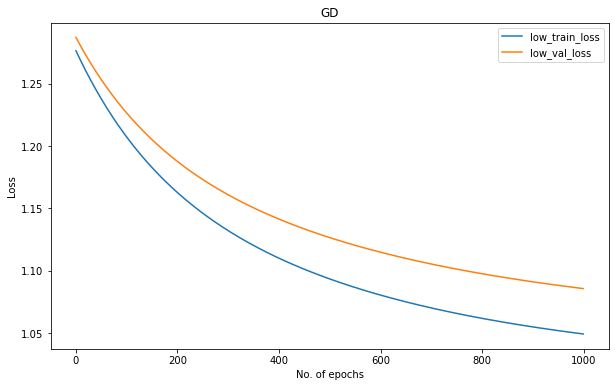

In [82]:
plt.figure(figsize = (10, 6))
plt.plot(low_train_loss_gd)
plt.plot(low_val_loss_gd)
plt.legend(["low_train_loss", "low_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("GD")
plt.show()

## REASON FOR USING SGD AND OTHER OPTIMIZERS :
#### SGD and other optimizers, which are used below, increase the convergence rate so that the loss gets minimized faster. In GD above, we see that the decrease in loss is steady but it is taking a lot of epochs to achieve the global minima.
#### Here, we will be comparing the convergence rates of the optimizers we are going to apply.
#### At first, we will be applying vanilla SGD

# SGD:
#### Equation for vanilla SGD algorithm :
$ {\displaystyle \mathbf {x} _{n+1}^t = \mathbf {x} _{n}^t - \gamma \nabla f(\mathbf {x} _{n}^t)} $

In [83]:
low_train_loader_sgd = DataLoader(low_train_dataset, batch_size = 1, shuffle=True)
low_valid_loader_sgd = DataLoader(low_valid_dataset, batch_size= len(low_valid_dataset), shuffle=True)
low_test_loader_sgd = DataLoader(low_test_dataset, batch_size=len(low_test_dataset), shuffle=True)

In [84]:
low_model_sgd = nn.Linear(30 , 1)
low_optimizer_sgd = torch.optim.SGD(low_model_sgd.parameters(), lr = 0.0005)

In [85]:
low_num_epochs_sgd = 50
low_train_loss_sgd = []
low_val_loss_sgd = []

for epoch in range(low_num_epochs_sgd):
    low_t_loss_sgd = train(low_model_sgd, low_train_loader_sgd, low_optimizer_sgd)
    _,low_v_loss_sgd = valid(low_model_sgd, low_valid_loader_sgd)
    low_train_loss_sgd.append(low_t_loss_sgd)
    low_val_loss_sgd.append(low_v_loss_sgd)
    print("epoch:",epoch+1,"\n","Training loss:", low_t_loss_sgd,"\n","Validation loss:", low_v_loss_sgd,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 0.4648233209261323 
 Validation loss: 1.7283709049224854 

epoch: 2 
 Training loss: 0.29163371745236016 
 Validation loss: 1.7943063974380493 

epoch: 3 
 Training loss: 0.27642579088681307 
 Validation loss: 1.7711858749389648 

epoch: 4 
 Training loss: 0.2722451275251296 
 Validation loss: 1.7974283695220947 

epoch: 5 
 Training loss: 0.27236324183291744 
 Validation loss: 1.8020586967468262 

epoch: 6 
 Training loss: 0.2727602545641985 
 Validation loss: 1.794468879699707 

epoch: 7 
 Training loss: 0.2723214291594169 
 Validation loss: 1.7980765104293823 

epoch: 8 
 Training loss: 0.2719726940746264 
 Validation loss: 1.785070776939392 

epoch: 9 
 Training loss: 0.27196590906660606 
 Validation loss: 1.7995151281356812 

epoch: 10 
 Training loss: 0.2724675920293098 
 Validation loss: 1.8286337852478027 

epoch: 11 
 Training loss: 0.2716023989639892 
 Validation loss: 1.804962158203125 

epoch: 12 
 Training loss: 0.2717856501690983 
 Validation los

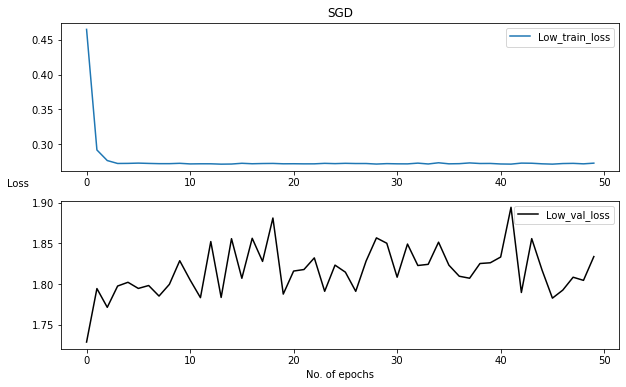

In [86]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
ax[0].plot(low_train_loss_sgd)
ax[0].legend(["Low_train_loss"])
ax[0].title.set_text('SGD')
ax[1].plot(low_val_loss_sgd, "k-")
ax[1].legend(["Low_val_loss"])
plt.xlabel("No. of epochs")
fig.text(0.05, 0.5, "Loss")
plt.show()

### OBSERVATION :
#### We see that the validation loss function is oscillating and non-decreasing. So, we shift to other optimizers 

# SGD (Minibatching):
### SGD Minibatching update rule :
$ {\displaystyle \mathbf {x} _{n+1}^j = \mathbf {x} _{n}^j - \alpha/p \sum \limits _{j =1}^{p} \nabla f(\mathbf {x} _{n}^j)} $

In [87]:
low_train_loader_sgd_mb = DataLoader(low_train_dataset, batch_size = 64, shuffle=True)
low_valid_loader_sgd_mb = DataLoader(low_valid_dataset, batch_size= len(low_valid_dataset), shuffle=True)
low_test_loader_sgd_mb = DataLoader(low_test_dataset, batch_size=len(low_test_dataset), shuffle=True)

In [88]:
low_model_sgd_mb = nn.Linear(30 , 1)
low_optimizer_sgd_mb = torch.optim.SGD(low_model_sgd_mb.parameters(), lr = 0.0005)

In [89]:
low_num_epochs_sgd_mb = 100
low_train_loss_sgd_mb = []
low_val_loss_sgd_mb = []

for epoch in range(low_num_epochs_sgd_mb):
    low_t_loss_sgd_mb = train(low_model_sgd_mb, low_train_loader_sgd_mb, low_optimizer_sgd_mb)
    _,low_v_loss_sgd_mb = valid(low_model_sgd_mb, low_valid_loader_sgd_mb)
    low_train_loss_sgd_mb.append(low_t_loss_sgd_mb)
    low_val_loss_sgd_mb.append(low_v_loss_sgd_mb)
    print("epoch:",epoch+1,"\n","Training loss:", low_t_loss_sgd_mb,"\n","Validation loss:", low_v_loss_sgd_mb,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 1.3188694443021503 
 Validation loss: 1.3241634368896484 

epoch: 2 
 Training loss: 1.3126796313694544 
 Validation loss: 1.3024418354034424 

epoch: 3 
 Training loss: 1.2734098928315298 
 Validation loss: 1.28325355052948 

epoch: 4 
 Training loss: 1.2614818232400076 
 Validation loss: 1.2652912139892578 

epoch: 5 
 Training loss: 1.2395157064710345 
 Validation loss: 1.2492960691452026 

epoch: 6 
 Training loss: 1.2184872695377895 
 Validation loss: 1.2353270053863525 

epoch: 7 
 Training loss: 1.192788909162794 
 Validation loss: 1.2228130102157593 

epoch: 8 
 Training loss: 1.186281088420323 
 Validation loss: 1.211132526397705 

epoch: 9 
 Training loss: 1.1767354658671787 
 Validation loss: 1.2005739212036133 

epoch: 10 
 Training loss: 1.1661300369671412 
 Validation loss: 1.1906144618988037 

epoch: 11 
 Training loss: 1.1471985289028712 
 Validation loss: 1.181732177734375 

epoch: 12 
 Training loss: 1.148188040937696 
 Validation loss: 1.173

epoch: 98 
 Training loss: 1.0007506694112505 
 Validation loss: 1.0511603355407715 

epoch: 99 
 Training loss: 1.0229042478970118 
 Validation loss: 1.05104398727417 

epoch: 100 
 Training loss: 1.0110142827033997 
 Validation loss: 1.0509471893310547 

Done


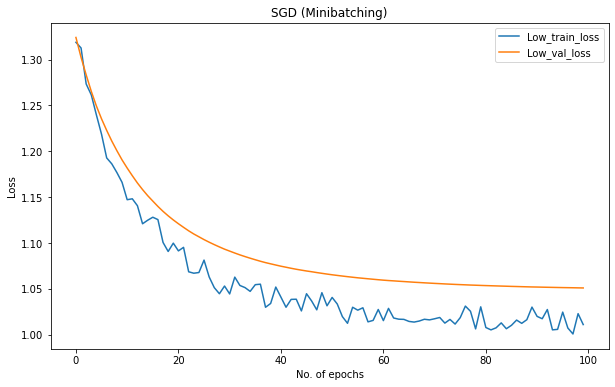

In [90]:
plt.figure(figsize = (10, 6))
plt.plot(low_train_loss_sgd_mb)
plt.plot(low_val_loss_sgd_mb)
plt.legend(["Low_train_loss", "Low_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("SGD (Minibatching)")
plt.show()

## Defining the dataloader for the rest of the optimizers:

In [91]:
low_train_loader_opt = DataLoader(low_train_dataset, batch_size = 64, shuffle=True)
low_valid_loader_opt = DataLoader(low_valid_dataset, batch_size= len(low_valid_dataset), shuffle=True)
low_test_loader_opt = DataLoader(low_test_dataset, batch_size=len(low_test_dataset), shuffle=True)

## ADAM:
### Adam update rule:
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,   
$ v = \alpha v - \eta * g $,   
$ w = w + v $

In [92]:
low_model_adam = nn.Linear(30, 1)
low_optimizer_adam = torch.optim.Adam(low_model_adam.parameters(), lr = 0.0005)

In [93]:
low_num_epochs_adam = 100
low_train_loss_adam = []
low_val_loss_adam = []

for epoch in range(low_num_epochs_adam):
    low_t_loss_adam = train(low_model_adam, low_train_loader_opt, low_optimizer_adam)
    _,low_v_loss_adam = valid(low_model_adam, low_valid_loader_opt)
    low_train_loss_adam.append(low_t_loss_adam)
    low_val_loss_adam.append(low_v_loss_adam)
    
    print("epoch:",epoch+1,"\n","Training loss:", low_t_loss_adam,"\n","Validation loss:", low_v_loss_adam,"\n")
print("Done")

epoch: 1 
 Training loss: 1.2724462032318116 
 Validation loss: 1.2324074506759644 

epoch: 2 
 Training loss: 1.2114376851490565 
 Validation loss: 1.18991219997406 

epoch: 3 
 Training loss: 1.1686470900263106 
 Validation loss: 1.15804123878479 

epoch: 4 
 Training loss: 1.1252217667443412 
 Validation loss: 1.13261878490448 

epoch: 5 
 Training loss: 1.1165666120392936 
 Validation loss: 1.1132301092147827 

epoch: 6 
 Training loss: 1.0805469495909554 
 Validation loss: 1.098110318183899 

epoch: 7 
 Training loss: 1.0647467953818186 
 Validation loss: 1.0865190029144287 

epoch: 8 
 Training loss: 1.0516177569116865 
 Validation loss: 1.0773059129714966 

epoch: 9 
 Training loss: 1.0449954118047442 
 Validation loss: 1.070456624031067 

epoch: 10 
 Training loss: 1.0354540535381862 
 Validation loss: 1.0648794174194336 

epoch: 11 
 Training loss: 1.0321188637188503 
 Validation loss: 1.0605077743530273 

epoch: 12 
 Training loss: 1.0316235423088074 
 Validation loss: 1.0570

epoch: 97 
 Training loss: 1.01034631388528 
 Validation loss: 1.0473271608352661 

epoch: 98 
 Training loss: 1.0149168814931597 
 Validation loss: 1.047524094581604 

epoch: 99 
 Training loss: 1.000893487249102 
 Validation loss: 1.0475493669509888 

epoch: 100 
 Training loss: 1.0094769971711295 
 Validation loss: 1.0474063158035278 

Done


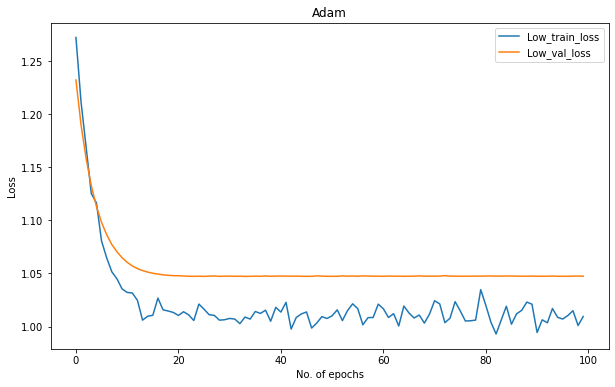

In [94]:
plt.figure(figsize = (10, 6))
plt.plot(low_train_loss_adam)
plt.plot(low_val_loss_adam)
plt.legend(["Low_train_loss", "Low_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Adam")
plt.show()

## Adagrad:
### Adagrad update rule :
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,   
$ r_t = r_{t-1} + g_t * g_t $,   
$ \hat{\eta} = \eta/(\delta + r_t) $,   
$ w_t = w_{t-1} - \hat{\eta} * g $

In [95]:
low_model_adagrad = nn.Linear(30, 1)
low_optimizer_adagrad = torch.optim.Adagrad(low_model_adagrad.parameters(), lr = 0.0005)

In [96]:
low_num_epochs_adagrad = 100
low_train_loss_adagrad = []
low_val_loss_adagrad = []

for epoch in range(low_num_epochs_adagrad):
    low_t_loss_adagrad = train(low_model_adagrad, low_train_loader_opt, low_optimizer_adagrad)
    _,low_v_loss_adagrad = valid(low_model_adagrad, low_valid_loader_opt)
    low_train_loss_adagrad.append(low_t_loss_adagrad)
    low_val_loss_adagrad.append(low_v_loss_adagrad)
    
    print("epoch:",epoch+1,"\n","Training loss:", low_t_loss_adagrad,"\n","Validation loss:", low_v_loss_adagrad,"\n")
print("Done")

epoch: 1 
 Training loss: 1.290802342551095 
 Validation loss: 1.297811508178711 

epoch: 2 
 Training loss: 1.280771883896419 
 Validation loss: 1.2893410921096802 

epoch: 3 
 Training loss: 1.2579758099147251 
 Validation loss: 1.2832329273223877 

epoch: 4 
 Training loss: 1.2542334215981619 
 Validation loss: 1.2780871391296387 

epoch: 5 
 Training loss: 1.2472243206841604 
 Validation loss: 1.273685336112976 

epoch: 6 
 Training loss: 1.2400337883404322 
 Validation loss: 1.2697597742080688 

epoch: 7 
 Training loss: 1.2472634434700012 
 Validation loss: 1.266247034072876 

epoch: 8 
 Training loss: 1.2307338220732553 
 Validation loss: 1.263060450553894 

epoch: 9 
 Training loss: 1.242939257621765 
 Validation loss: 1.2599748373031616 

epoch: 10 
 Training loss: 1.2493958898953028 
 Validation loss: 1.2571676969528198 

epoch: 11 
 Training loss: 1.2357484885624477 
 Validation loss: 1.2545876502990723 

epoch: 12 
 Training loss: 1.2416946973119463 
 Validation loss: 1.252

epoch: 99 
 Training loss: 1.1598844970975604 
 Validation loss: 1.168343424797058 

epoch: 100 
 Training loss: 1.1368943027087621 
 Validation loss: 1.1678537130355835 

Done


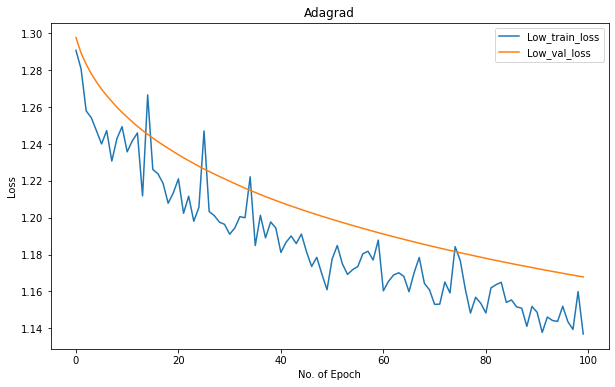

In [97]:
plt.figure(figsize = (10, 6))
plt.plot(low_train_loss_adagrad)
plt.plot(low_val_loss_adagrad)
plt.legend(["Low_train_loss", "Low_val_loss"])
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("Adagrad")
plt.show()

## RMSProp:
### RMSProp update rule :
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,
$ r_t = \alpha * r_{t-1} + {1- \alpha} * g_t * g_t $,   
$ \hat{\eta} = \eta/\sqrt(\delta + r_t) $,   
$ w_t = w_{t-1} - \hat{\eta} * g $

In [98]:
low_model_rmsprop = nn.Linear(30, 1)
low_optimizer_rmsprop = torch.optim.RMSprop(low_model_rmsprop.parameters(), lr = 0.00005)

In [99]:
low_num_epochs_rmsprop = 100
low_train_loss_rmsprop = []
low_val_loss_rmsprop = []

for epoch in range(low_num_epochs_rmsprop):
    low_t_loss_rmsprop = train(low_model_rmsprop, low_train_loader_opt, low_optimizer_rmsprop)
    _,low_v_loss_rmsprop = valid(low_model_rmsprop, low_valid_loader_opt)
    low_train_loss_rmsprop.append(low_t_loss_rmsprop)
    low_val_loss_rmsprop.append(low_v_loss_rmsprop)
    
    print("epoch:",epoch+1,"\n","Training loss:", low_t_loss_rmsprop,"\n","Validation loss:", low_v_loss_rmsprop,"\n")
print("Done")

epoch: 1 
 Training loss: 1.302084333556039 
 Validation loss: 1.2901952266693115 

epoch: 2 
 Training loss: 1.288204676764352 
 Validation loss: 1.2803400754928589 

epoch: 3 
 Training loss: 1.2771933896200998 
 Validation loss: 1.2723276615142822 

epoch: 4 
 Training loss: 1.2900303772517614 
 Validation loss: 1.2652690410614014 

epoch: 5 
 Training loss: 1.2546122482844762 
 Validation loss: 1.2591549158096313 

epoch: 6 
 Training loss: 1.274791865689414 
 Validation loss: 1.2533142566680908 

epoch: 7 
 Training loss: 1.2498681000300815 
 Validation loss: 1.247888207435608 

epoch: 8 
 Training loss: 1.254414028780801 
 Validation loss: 1.2426540851593018 

epoch: 9 
 Training loss: 1.2468723092760359 
 Validation loss: 1.237428903579712 

epoch: 10 
 Training loss: 1.233324716772352 
 Validation loss: 1.2326699495315552 

epoch: 11 
 Training loss: 1.2209647502217973 
 Validation loss: 1.2279353141784668 

epoch: 12 
 Training loss: 1.2293273619243077 
 Validation loss: 1.223

epoch: 99 
 Training loss: 1.0278830443109785 
 Validation loss: 1.0542750358581543 

epoch: 100 
 Training loss: 1.0236043640545436 
 Validation loss: 1.053979516029358 

Done


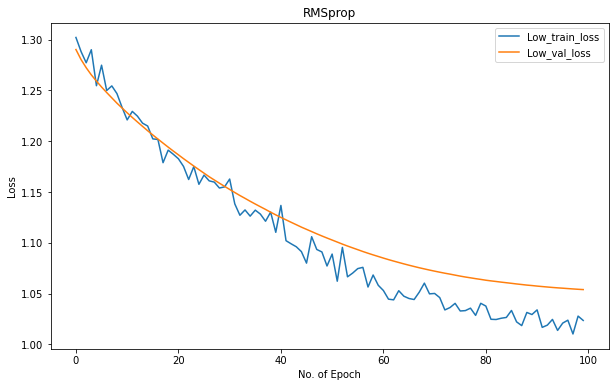

In [100]:
plt.figure(figsize = (10, 6))
plt.plot(low_train_loss_rmsprop)
plt.plot(low_val_loss_rmsprop)
plt.legend(["Low_train_loss", "Low_val_loss"])
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("RMSprop")
plt.show()

### OBSERVATION :
#### We see that between all the above 4 optimizers, Adam has the highest convergence rate, as the loss obtains the minima the fastest in case of Adam. 

# Regions having high population, high white people percentage and high income:

In [101]:
a3 = np.logical_and(data["TotalPop"] > 5532.750000, data["White"] > 87.700000)
a4 = np.logical_and(data["Income"] > 74688.000000, a3); a4

0        False
1        False
2        False
3        False
4        False
         ...  
72713    False
72714    False
72715    False
72716    False
72717    False
Length: 72718, dtype: bool

In [102]:
high_data = data[a4]
high_data

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
18,Alabama,Baldwin County,8068,49.157164,50.842836,4.3,92.1,1.4,0.3,0.7,...,0.9,0.4,4.1,26.4,46.194844,35.292861,9.007995,1.709209,0.184779,2.3
464,Alabama,Jefferson County,6044,48.775645,51.224355,2.1,91.3,2.9,0.7,2.2,...,0.0,1.7,3.4,15.1,49.768365,41.705890,7.116876,0.945599,0.000000,3.5
468,Alabama,Jefferson County,6923,51.653907,48.346093,0.7,92.4,2.9,0.2,2.3,...,0.0,0.0,2.2,20.5,47.190524,35.251322,8.683056,3.020194,0.188762,3.8
521,Alabama,Jefferson County,5661,52.587882,47.412118,2.2,95.1,0.0,0.0,2.5,...,0.0,1.0,15.1,17.5,46.581876,36.613355,4.984261,4.797933,0.232909,1.8
706,Alabama,Madison County,14881,50.487198,49.512802,1.3,92.0,3.3,0.3,1.9,...,0.3,0.4,5.8,24.4,43.888180,32.257812,9.918729,1.711639,0.000000,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71729,Wyoming,Campbell County,5938,49.730549,50.269451,3.3,91.9,0.0,1.9,0.8,...,2.6,1.1,2.5,18.5,52.559784,39.787757,11.510593,1.261435,0.000000,2.5
71780,Wyoming,Laramie County,8727,50.750544,49.249456,8.9,87.8,2.1,0.0,0.0,...,2.0,0.9,7.7,21.7,46.705626,29.144311,12.984164,3.596333,0.934113,2.7
71818,Wyoming,Sublette County,6284,52.705283,47.294717,9.5,89.9,0.0,0.2,0.1,...,4.6,1.1,8.5,22.4,57.702101,41.776321,14.021610,1.904169,0.000000,5.4
71824,Wyoming,Sweetwater County,7754,52.476141,47.523859,7.6,91.0,0.0,0.0,0.0,...,0.0,2.7,2.4,18.5,49.909724,41.474981,5.889347,2.545396,0.000000,1.7


In [103]:
cols = list(high_data.columns.values)
cols.pop(cols.index('Income')) 
high_data = high_data[cols+['Income']]
high_data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
18,Alabama,Baldwin County,8068,49.157164,50.842836,4.3,92.1,1.4,0.3,0.7,...,0.4,4.1,26.4,46.194844,35.292861,9.007995,1.709209,0.184779,2.3,80800.0
464,Alabama,Jefferson County,6044,48.775645,51.224355,2.1,91.3,2.9,0.7,2.2,...,1.7,3.4,15.1,49.768365,41.705890,7.116876,0.945599,0.000000,3.5,110739.0
468,Alabama,Jefferson County,6923,51.653907,48.346093,0.7,92.4,2.9,0.2,2.3,...,0.0,2.2,20.5,47.190524,35.251322,8.683056,3.020194,0.188762,3.8,114725.0
521,Alabama,Jefferson County,5661,52.587882,47.412118,2.2,95.1,0.0,0.0,2.5,...,1.0,15.1,17.5,46.581876,36.613355,4.984261,4.797933,0.232909,1.8,154643.0
706,Alabama,Madison County,14881,50.487198,49.512802,1.3,92.0,3.3,0.3,1.9,...,0.4,5.8,24.4,43.888180,32.257812,9.918729,1.711639,0.000000,3.2,113725.0


In [104]:
high_data_wi = high_data.drop("Income", axis = 1)

#### CALCULATING THE CORRELATION :

In [105]:
high_data_wi_corr = high_data_wi.corr()
high_data_wi_corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,0.026682,-0.026682,-0.036745,-0.059461,0.071684,0.025134,0.054336,0.003543,-0.219218,...,-0.047777,-0.014727,-0.003981,-0.050978,-0.007143,0.041138,-0.041863,-0.101081,-0.008833,-0.064050
Men,0.026682,1.000000,-1.000000,0.053873,0.089078,-0.065934,0.097157,-0.163964,0.050553,-0.095862,...,-0.066508,0.046461,0.000176,0.012105,0.073875,0.059346,-0.003501,0.050241,0.014771,-0.009424
Women,-0.026682,-1.000000,1.000000,-0.053873,-0.089078,0.065934,-0.097157,0.163964,-0.050553,0.095862,...,0.066508,-0.046461,-0.000176,-0.012105,-0.073875,-0.059346,0.003501,-0.050241,-0.014771,0.009424
Hispanic,-0.036745,0.053873,-0.053873,1.000000,-0.509634,-0.170258,0.010856,-0.122955,0.039562,-0.036306,...,0.059041,0.118398,0.104028,0.116020,-0.133105,-0.177159,0.062388,0.065189,0.006621,0.128842
White,-0.059461,0.089078,-0.089078,-0.509634,1.000000,-0.369975,-0.088378,-0.478266,-0.022600,0.150829,...,-0.041610,-0.126486,-0.103747,-0.018453,0.130369,0.123310,-0.021552,0.050706,0.013248,-0.023299
Black,0.071684,-0.065934,0.065934,-0.170258,-0.369975,1.000000,-0.029526,-0.084198,-0.047332,0.017741,...,-0.054339,-0.069252,-0.086102,-0.056046,-0.031751,-0.040301,0.077975,-0.117573,-0.022312,-0.011004
Native,0.025134,0.097157,-0.097157,0.010856,-0.088378,-0.029526,1.000000,-0.088024,0.006414,-0.030325,...,0.054856,0.104520,-0.050813,-0.057182,0.040920,-0.002943,0.067843,0.031837,-0.042988,-0.081335
Asian,0.054336,-0.163964,0.163964,-0.122955,-0.478266,-0.084198,-0.088024,1.000000,-0.064388,-0.124242,...,0.043496,0.061668,0.113333,-0.026028,-0.020189,0.069613,-0.134611,-0.072846,-0.020784,-0.077847
Pacific,0.003543,0.050553,-0.050553,0.039562,-0.022600,-0.047332,0.006414,-0.064388,1.000000,-0.178200,...,-0.025079,0.006078,0.062438,-0.066227,-0.149177,-0.137927,0.000765,-0.025188,0.012034,0.023339
VotingAgeCitizen,-0.219218,-0.095862,0.095862,-0.036306,0.150829,0.017741,-0.030325,-0.124242,-0.178200,1.000000,...,0.149039,0.060801,-0.079172,0.031290,0.192803,0.055628,0.157767,0.183997,0.031760,0.210151


In [106]:
upper_triangular_high = high_data_wi_corr.where(np.triu(np.ones(high_data_wi_corr.shape),k=1).astype(np.bool))
print(upper_triangular_high)

                  TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop               NaN  0.026682 -0.026682 -0.036745 -0.059461  0.071684   
Men                    NaN       NaN -1.000000  0.053873  0.089078 -0.065934   
Women                  NaN       NaN       NaN -0.053873 -0.089078  0.065934   
Hispanic               NaN       NaN       NaN       NaN -0.509634 -0.170258   
White                  NaN       NaN       NaN       NaN       NaN -0.369975   
Black                  NaN       NaN       NaN       NaN       NaN       NaN   
Native                 NaN       NaN       NaN       NaN       NaN       NaN   
Asian                  NaN       NaN       NaN       NaN       NaN       NaN   
Pacific                NaN       NaN       NaN       NaN       NaN       NaN   
VotingAgeCitizen       NaN       NaN       NaN       NaN       NaN       NaN   
IncomeErr              NaN       NaN       NaN       NaN       NaN       NaN   
IncomePerCap           NaN       NaN    

<ipython-input-106-15fe6743628a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular_high = high_data_wi_corr.where(np.triu(np.ones(high_data_wi_corr.shape),k=1).astype(np.bool))


#### CHECKING AND REMOVING THE COLUMNS HAVING CORRELATION > 0.8 :

In [107]:
drop_col_high = [column for column in upper_triangular_high.columns if any(upper_triangular_high[column] > 0.8)]
print(drop_col_high)

['IncomePerCapErr', 'PrivateWork']


In [108]:
data_high_cl = high_data.drop(drop_col_high, axis = 1)
data_high_cl

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
18,Alabama,Baldwin County,8068,49.157164,50.842836,4.3,92.1,1.4,0.3,0.7,...,0.9,0.4,4.1,26.4,46.194844,9.007995,1.709209,0.184779,2.3,80800.0
464,Alabama,Jefferson County,6044,48.775645,51.224355,2.1,91.3,2.9,0.7,2.2,...,0.0,1.7,3.4,15.1,49.768365,7.116876,0.945599,0.000000,3.5,110739.0
468,Alabama,Jefferson County,6923,51.653907,48.346093,0.7,92.4,2.9,0.2,2.3,...,0.0,0.0,2.2,20.5,47.190524,8.683056,3.020194,0.188762,3.8,114725.0
521,Alabama,Jefferson County,5661,52.587882,47.412118,2.2,95.1,0.0,0.0,2.5,...,0.0,1.0,15.1,17.5,46.581876,4.984261,4.797933,0.232909,1.8,154643.0
706,Alabama,Madison County,14881,50.487198,49.512802,1.3,92.0,3.3,0.3,1.9,...,0.3,0.4,5.8,24.4,43.888180,9.918729,1.711639,0.000000,3.2,113725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71729,Wyoming,Campbell County,5938,49.730549,50.269451,3.3,91.9,0.0,1.9,0.8,...,2.6,1.1,2.5,18.5,52.559784,11.510593,1.261435,0.000000,2.5,88851.0
71780,Wyoming,Laramie County,8727,50.750544,49.249456,8.9,87.8,2.1,0.0,0.0,...,2.0,0.9,7.7,21.7,46.705626,12.984164,3.596333,0.934113,2.7,75877.0
71818,Wyoming,Sublette County,6284,52.705283,47.294717,9.5,89.9,0.0,0.2,0.1,...,4.6,1.1,8.5,22.4,57.702101,14.021610,1.904169,0.000000,5.4,88672.0
71824,Wyoming,Sweetwater County,7754,52.476141,47.523859,7.6,91.0,0.0,0.0,0.0,...,0.0,2.7,2.4,18.5,49.909724,5.889347,2.545396,0.000000,1.7,75394.0


#### STANDARDIZING THE DATA :

In [109]:
scaler = StandardScaler()
X_high = scaler.fit_transform(data_high_cl.iloc[:,3:-1].values)
y_high = scaler.fit_transform(data_high_cl[['Income']])
y_high = np.array(y_high)
y_high = y_high.reshape((1242,))

print(X_high.shape, y_high.shape)

(1242, 30) (1242,)


#### TRAIN-VALIDATION-TEST SPLITTING :

In [110]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size = 0.20)
X_high_train, X_high_val, y_high_train, y_high_val = train_test_split(X_high_train, y_high_train, test_size = 0.20)

print(f"X_train:{X_high_train.shape}\ny_train:{y_high_train.shape}")
print(f"X_test:{X_high_test.shape}")
print(f"y_test:{y_high_test.shape}")
print(f"X_val:{X_high_val.shape}")
print(f"y_val:{y_high_val.shape}")

X_train:(794, 30)
y_train:(794,)
X_test:(249, 30)
y_test:(249,)
X_val:(199, 30)
y_val:(199,)


In [111]:
res_high = sm.OLS(y_high_train, X_high_train).fit()
print(res_high.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              99.86
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                   1.45e-237
Time:                        13:17:23   Log-Likelihood:                         -495.89
No. Observations:                 794   AIC:                                      1050.
Df Residuals:                     765   BIC:                                      1185.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### APPLYING THE LINEAR REGRESSION MODEL AND CALCULATING THE TEST AND TRAIN r2 SCORES:

In [112]:
model = LinearRegression()
model.fit(X_high_train, y_high_train)
y_high_pred_test = model.predict(X_high_test)
y_high_pred_train  =  model.predict(X_high_train)
mean_squared_error(y_high_test, y_high_pred_test), mean_absolute_error(y_high_test, y_high_pred_test) 
train_score_high = r2_score(y_high_train, y_high_pred_train)
test_score_high = r2_score(y_high_test, y_high_pred_test)
train_score_high, test_score_high

(0.790791072476778, 0.5785591770768602)

#### CONVERSION TO PYTORCH :

In [113]:
X_high_train = torch.from_numpy(X_high_train.astype(np.float32))
y_high_train = torch.from_numpy(y_high_train.astype(np.float32))
X_high_val = torch.from_numpy(X_high_val.astype(np.float32))
y_high_val = torch.from_numpy(y_high_val.astype(np.float32))
X_high_test = torch.from_numpy(X_high_test.astype(np.float32))
y_high_test = torch.from_numpy(y_high_test.astype(np.float32))

In [114]:
high_train_dataset = TensorDataset(X_high_train, y_high_train)
high_test_dataset = TensorDataset(X_high_test, y_high_test)
high_valid_dataset = TensorDataset(X_high_val, y_high_val)

#### DEFINING THE TRAIN AND VALIDATION MODELS :

In [115]:
def train(model,train_loader,optimizer):
    train_loss=[]
    model.train()
    for i, (x,y) in enumerate(train_loader):
        y_pred = model(x.requires_grad_())
        loss= l(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss.append(loss.item())
    return np.mean(train_loss)

In [116]:
def valid(model,valid_loader):
    valid_loss=[]
    model.eval()
    for i, (x,y) in enumerate(valid_loader):
        y_pred=model(x)
        loss=l(y_pred,y)
        valid_loss.append(loss.item())
    return y_pred,np.mean(valid_loss)

## GD (For whole training dataset):
#### Equation of gradient descent algorithm :
$ {\displaystyle \mathbf {x} _{n+1}=\mathbf {x} _{n}-\alpha \nabla f(\mathbf {x} _{n})} $

In [117]:
high_train_loader = DataLoader(high_train_dataset, batch_size = len(high_train_dataset), shuffle=True)
high_valid_loader = DataLoader(high_valid_dataset, batch_size= len(high_valid_dataset), shuffle=True)
high_test_loader = DataLoader(high_test_dataset, batch_size=len(high_test_dataset), shuffle=True)

In [118]:
l = nn.MSELoss()

In [119]:
high_model_gd = nn.Linear(30, 1)
high_optimizer_gd = torch.optim.SGD(high_model_gd.parameters(), lr = 0.0005)

In [120]:
high_num_epochs_gd = 1000
high_train_loss_gd = []
high_val_loss_gd = []

for epoch in range(high_num_epochs_gd):
    high_t_loss_gd = train(high_model_gd, high_train_loader, high_optimizer_gd)
    _,high_v_loss_gd = valid(high_model_gd, high_valid_loader)
    high_train_loss_gd.append(high_t_loss_gd)
    high_val_loss_gd.append(high_v_loss_gd)
    print("epoch:",epoch+1,"\n","Training loss:", high_t_loss_gd,"\n","Validation loss:",high_v_loss_gd,"\n")
print("Done")

epoch: 1 
 Training loss: 1.33237886428833 
 Validation loss: 1.5273418426513672 

epoch: 2 
 Training loss: 1.330979824066162 

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([794])) that is different to the input size (torch.Size([794, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([199])) that is different to the input size (torch.Size([199, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



 Validation loss: 1.525823950767517 

epoch: 3 
 Training loss: 1.3295902013778687 
 Validation loss: 1.524315357208252 

epoch: 4 
 Training loss: 1.3282099962234497 
 Validation loss: 1.5228164196014404 

epoch: 5 
 Training loss: 1.3268389701843262 
 Validation loss: 1.521327018737793 

epoch: 6 
 Training loss: 1.325477123260498 
 Validation loss: 1.51984703540802 

epoch: 7 
 Training loss: 1.3241244554519653 
 Validation loss: 1.518376350402832 

epoch: 8 
 Training loss: 1.3227806091308594 
 Validation loss: 1.516914963722229 

epoch: 9 
 Training loss: 1.3214458227157593 
 Validation loss: 1.515462875366211 

epoch: 10 
 Training loss: 1.3201197385787964 
 Validation loss: 1.5140197277069092 

epoch: 11 
 Training loss: 1.3188025951385498 
 Validation loss: 1.5125856399536133 

epoch: 12 
 Training loss: 1.3174939155578613 
 Validation loss: 1.5111606121063232 

epoch: 13 
 Training loss: 1.3161938190460205 
 Validation loss: 1.5097445249557495 

epoch: 14 
 Training loss: 1.3

epoch: 106 
 Training loss: 1.2246047258377075 
 Validation loss: 1.4085052013397217 

epoch: 107 
 Training loss: 1.2238625288009644 
 Validation loss: 1.4076714515686035 

epoch: 108 
 Training loss: 1.2231242656707764 
 Validation loss: 1.4068416357040405 

epoch: 109 
 Training loss: 1.222389817237854 
 Validation loss: 1.406016230583191 

epoch: 110 
 Training loss: 1.221659541130066 
 Validation loss: 1.405194878578186 

epoch: 111 
 Training loss: 1.2209328413009644 
 Validation loss: 1.4043775796890259 

epoch: 112 
 Training loss: 1.2202099561691284 
 Validation loss: 1.403564453125 

epoch: 113 
 Training loss: 1.2194910049438477 
 Validation loss: 1.4027551412582397 

epoch: 114 
 Training loss: 1.2187756299972534 
 Validation loss: 1.4019498825073242 

epoch: 115 
 Training loss: 1.2180639505386353 
 Validation loss: 1.4011486768722534 

epoch: 116 
 Training loss: 1.2173563241958618 
 Validation loss: 1.4003515243530273 

epoch: 117 
 Training loss: 1.2166520357131958 
 Va

epoch: 212 
 Training loss: 1.1630548238754272 
 Validation loss: 1.3385019302368164 

epoch: 213 
 Training loss: 1.1626015901565552 
 Validation loss: 1.3379799127578735 

epoch: 214 
 Training loss: 1.1621500253677368 
 Validation loss: 1.337459921836853 

epoch: 215 
 Training loss: 1.1617004871368408 
 Validation loss: 1.3369420766830444 

epoch: 216 
 Training loss: 1.161252737045288 
 Validation loss: 1.336426019668579 

epoch: 217 
 Training loss: 1.160806655883789 
 Validation loss: 1.3359121084213257 

epoch: 218 
 Training loss: 1.1603624820709229 
 Validation loss: 1.335399866104126 

epoch: 219 
 Training loss: 1.1599199771881104 
 Validation loss: 1.3348897695541382 

epoch: 220 
 Training loss: 1.1594792604446411 
 Validation loss: 1.3343816995620728 

epoch: 221 
 Training loss: 1.1590402126312256 
 Validation loss: 1.3338754177093506 

epoch: 222 
 Training loss: 1.1586030721664429 
 Validation loss: 1.3333710432052612 

epoch: 223 
 Training loss: 1.1581674814224243 


epoch: 318 
 Training loss: 1.123272180557251 
 Validation loss: 1.2923591136932373 

epoch: 319 
 Training loss: 1.1229612827301025 
 Validation loss: 1.2919960021972656 

epoch: 320 
 Training loss: 1.1226513385772705 
 Validation loss: 1.291634202003479 

epoch: 321 
 Training loss: 1.1223424673080444 
 Validation loss: 1.2912734746932983 

epoch: 322 
 Training loss: 1.1220344305038452 
 Validation loss: 1.2909138202667236 

epoch: 323 
 Training loss: 1.1217273473739624 
 Validation loss: 1.2905552387237549 

epoch: 324 
 Training loss: 1.1214213371276855 
 Validation loss: 1.2901978492736816 

epoch: 325 
 Training loss: 1.1211161613464355 
 Validation loss: 1.2898414134979248 

epoch: 326 
 Training loss: 1.120812177658081 
 Validation loss: 1.289486050605774 

epoch: 327 
 Training loss: 1.1205089092254639 
 Validation loss: 1.2891318798065186 

epoch: 328 
 Training loss: 1.120206594467163 
 Validation loss: 1.2887786626815796 

epoch: 329 
 Training loss: 1.1199052333831787 


epoch: 414 
 Training loss: 1.0972565412521362 
 Validation loss: 1.2618874311447144 

epoch: 415 
 Training loss: 1.0970206260681152 
 Validation loss: 1.2616101503372192 

epoch: 416 
 Training loss: 1.096785306930542 
 Validation loss: 1.261333703994751 

epoch: 417 
 Training loss: 1.0965505838394165 
 Validation loss: 1.2610582113265991 

epoch: 418 
 Training loss: 1.0963166952133179 
 Validation loss: 1.260783076286316 

epoch: 419 
 Training loss: 1.096083164215088 
 Validation loss: 1.2605087757110596 

epoch: 420 
 Training loss: 1.0958503484725952 
 Validation loss: 1.2602351903915405 

epoch: 421 
 Training loss: 1.0956181287765503 
 Validation loss: 1.2599623203277588 

epoch: 422 
 Training loss: 1.0953866243362427 
 Validation loss: 1.2596901655197144 

epoch: 423 
 Training loss: 1.0951555967330933 
 Validation loss: 1.2594186067581177 

epoch: 424 
 Training loss: 1.0949251651763916 
 Validation loss: 1.2591478824615479 

epoch: 425 
 Training loss: 1.0946953296661377 

epoch: 517 
 Training loss: 1.0758397579193115 
 Validation loss: 1.236677646636963 

epoch: 518 
 Training loss: 1.0756570100784302 
 Validation loss: 1.2364619970321655 

epoch: 519 
 Training loss: 1.0754746198654175 
 Validation loss: 1.236246943473816 

epoch: 520 
 Training loss: 1.0752925872802734 
 Validation loss: 1.236032247543335 

epoch: 521 
 Training loss: 1.0751111507415771 
 Validation loss: 1.2358181476593018 

epoch: 522 
 Training loss: 1.0749300718307495 
 Validation loss: 1.2356046438217163 

epoch: 523 
 Training loss: 1.07474946975708 
 Validation loss: 1.23539137840271 

epoch: 524 
 Training loss: 1.0745691061019897 
 Validation loss: 1.235178828239441 

epoch: 525 
 Training loss: 1.0743893384933472 
 Validation loss: 1.2349666357040405 

epoch: 526 
 Training loss: 1.0742099285125732 
 Validation loss: 1.2347549200057983 

epoch: 527 
 Training loss: 1.074030876159668 
 Validation loss: 1.2345439195632935 

epoch: 528 
 Training loss: 1.073852300643921 
 Vali

epoch: 614 
 Training loss: 1.0599091053009033 
 Validation loss: 1.217860460281372 

epoch: 615 
 Training loss: 1.0597621202468872 
 Validation loss: 1.2176865339279175 

epoch: 616 
 Training loss: 1.0596152544021606 
 Validation loss: 1.217512845993042 

epoch: 617 
 Training loss: 1.0594689846038818 
 Validation loss: 1.2173396348953247 

epoch: 618 
 Training loss: 1.059322714805603 
 Validation loss: 1.217166781425476 

epoch: 619 
 Training loss: 1.059177041053772 
 Validation loss: 1.2169941663742065 

epoch: 620 
 Training loss: 1.0590314865112305 
 Validation loss: 1.2168220281600952 

epoch: 621 
 Training loss: 1.0588862895965576 
 Validation loss: 1.216650366783142 

epoch: 622 
 Training loss: 1.0587414503097534 
 Validation loss: 1.216478943824768 

epoch: 623 
 Training loss: 1.0585969686508179 
 Validation loss: 1.2163077592849731 

epoch: 624 
 Training loss: 1.0584527254104614 
 Validation loss: 1.2161370515823364 

epoch: 625 
 Training loss: 1.0583088397979736 
 V

epoch: 710 
 Training loss: 1.0471231937408447 
 Validation loss: 1.20270836353302 

epoch: 711 
 Training loss: 1.0470030307769775 
 Validation loss: 1.2025656700134277 

epoch: 712 
 Training loss: 1.0468831062316895 
 Validation loss: 1.2024232149124146 

epoch: 713 
 Training loss: 1.046763300895691 
 Validation loss: 1.20228111743927 

epoch: 714 
 Training loss: 1.0466439723968506 
 Validation loss: 1.2021393775939941 

epoch: 715 
 Training loss: 1.0465247631072998 
 Validation loss: 1.201997995376587 

epoch: 716 
 Training loss: 1.0464057922363281 
 Validation loss: 1.2018566131591797 

epoch: 717 
 Training loss: 1.0462870597839355 
 Validation loss: 1.2017155885696411 

epoch: 718 
 Training loss: 1.0461686849594116 
 Validation loss: 1.2015750408172607 

epoch: 719 
 Training loss: 1.0460504293441772 
 Validation loss: 1.2014344930648804 

epoch: 720 
 Training loss: 1.0459325313568115 
 Validation loss: 1.2012944221496582 

epoch: 721 
 Training loss: 1.0458146333694458 
 

epoch: 806 
 Training loss: 1.036627173423767 
 Validation loss: 1.1902234554290771 

epoch: 807 
 Training loss: 1.0365281105041504 
 Validation loss: 1.1901053190231323 

epoch: 808 
 Training loss: 1.0364291667938232 
 Validation loss: 1.1899874210357666 

epoch: 809 
 Training loss: 1.0363304615020752 
 Validation loss: 1.18986976146698 

epoch: 810 
 Training loss: 1.0362318754196167 
 Validation loss: 1.189752221107483 

epoch: 811 
 Training loss: 1.0361336469650269 
 Validation loss: 1.189634919166565 

epoch: 812 
 Training loss: 1.036035418510437 
 Validation loss: 1.1895179748535156 

epoch: 813 
 Training loss: 1.0359375476837158 
 Validation loss: 1.1894012689590454 

epoch: 814 
 Training loss: 1.0358399152755737 
 Validation loss: 1.1892846822738647 

epoch: 815 
 Training loss: 1.0357422828674316 
 Validation loss: 1.1891684532165527 

epoch: 816 
 Training loss: 1.0356448888778687 
 Validation loss: 1.1890523433685303 

epoch: 817 
 Training loss: 1.0355478525161743 
 

epoch: 909 
 Training loss: 1.027370572090149 
 Validation loss: 1.1791632175445557 

epoch: 910 
 Training loss: 1.0272893905639648 
 Validation loss: 1.1790658235549927 

epoch: 911 
 Training loss: 1.0272083282470703 
 Validation loss: 1.178968906402588 

epoch: 912 
 Training loss: 1.0271275043487549 
 Validation loss: 1.178871989250183 

epoch: 913 
 Training loss: 1.027046799659729 
 Validation loss: 1.178775429725647 

epoch: 914 
 Training loss: 1.0269662141799927 
 Validation loss: 1.1786787509918213 

epoch: 915 
 Training loss: 1.0268858671188354 
 Validation loss: 1.1785825490951538 

epoch: 916 
 Training loss: 1.0268056392669678 
 Validation loss: 1.1784862279891968 

epoch: 917 
 Training loss: 1.0267254114151 
 Validation loss: 1.1783902645111084 

epoch: 918 
 Training loss: 1.026645541191101 
 Validation loss: 1.1782944202423096 

epoch: 919 
 Training loss: 1.0265657901763916 
 Validation loss: 1.1781988143920898 

epoch: 920 
 Training loss: 1.0264860391616821 
 Val

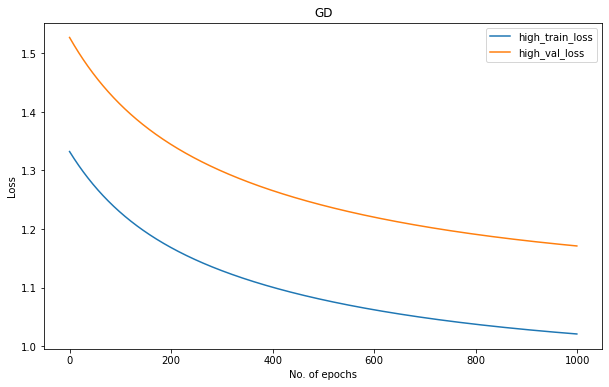

In [121]:
plt.figure(figsize = (10, 6))
plt.plot(high_train_loss_gd)
plt.plot(high_val_loss_gd)
plt.legend(["high_train_loss", "high_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("GD")
plt.show()

## REASON FOR USING SGD AND OTHER OPTIMIZERS :
#### SGD and other optimizers, which are used below, increase the convergence rate so that the loss gets minimized faster. In GD above, we see that the decrease in loss is steady but it is taking a lot of epochs to achieve the global minima.
#### Here, we will be comparing the convergence rates of the optimizers we are going to apply.
#### At first, we will be applying vanilla SGD

# SGD:
#### Equation for vanilla SGD algorithm :
$ {\displaystyle \mathbf {x} _{n+1}^t = \mathbf {x} _{n}^t - \gamma \nabla f(\mathbf {x} _{n}^t)} $

In [122]:
high_train_loader_sgd = DataLoader(high_train_dataset, batch_size = 1, shuffle=True)
high_valid_loader_sgd = DataLoader(high_valid_dataset, batch_size= len(high_valid_dataset), shuffle=True)
high_test_loader_sgd = DataLoader(high_test_dataset, batch_size=len(high_test_dataset), shuffle=True)

In [123]:
high_model_sgd = nn.Linear(30 , 1)
high_optimizer_sgd = torch.optim.SGD(high_model_sgd.parameters(), lr = 0.0005)

In [124]:
high_num_epochs_sgd = 50
high_train_loss_sgd = []
high_val_loss_sgd = []

for epoch in range(high_num_epochs_sgd):
    high_t_loss_sgd = train(high_model_sgd, high_train_loader_sgd, high_optimizer_sgd)
    _,high_v_loss_sgd = valid(high_model_sgd, high_valid_loader_sgd)
    high_train_loss_sgd.append(high_t_loss_sgd)
    high_val_loss_sgd.append(high_v_loss_sgd)
    print("epoch:",epoch+1,"\n","Training loss:", high_t_loss_sgd,"\n","Validation loss:", high_v_loss_sgd,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 0.7071600791060406 
 Validation loss: 1.666762113571167 

epoch: 2 
 Training loss: 0.3385093226165983 
 Validation loss: 1.699242115020752 

epoch: 3 
 Training loss: 0.27835765927646194 
 Validation loss: 1.8365962505340576 

epoch: 4 
 Training loss: 0.2549695570078835 
 Validation loss: 1.7882286310195923 

epoch: 5 
 Training loss: 0.2397172439571034 
 Validation loss: 1.8326483964920044 

epoch: 6 
 Training loss: 0.23152350598607938 
 Validation loss: 1.7745527029037476 

epoch: 7 
 Training loss: 0.2258525305448362 
 Validation loss: 1.7900806665420532 

epoch: 8 
 Training loss: 0.22248056875605277 
 Validation loss: 1.8315473794937134 

epoch: 9 
 Training loss: 0.21947704783057934 
 Validation loss: 1.825504183769226 

epoch: 10 
 Training loss: 0.21718626707371153 
 Validation loss: 1.8350183963775635 

epoch: 11 
 Training loss: 0.21483987993986356 
 Validation loss: 1.8218048810958862 

epoch: 12 
 Training loss: 0.21292173919577043 
 Validation 

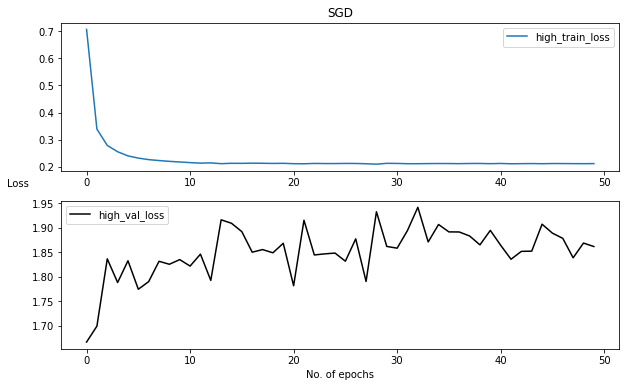

In [125]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
ax[0].plot(high_train_loss_sgd)
ax[0].legend(["high_train_loss"])
ax[0].title.set_text('SGD')
ax[1].plot(high_val_loss_sgd, "k-")
ax[1].legend(["high_val_loss"])
plt.xlabel("No. of epochs")
fig.text(0.05, 0.5, "Loss")
plt.show()

### OBSERVATION :
#### We see that the validation loss function is oscillating and non-decreasing. So, we shift to other optimizers 

# SGD (Minibatching):
### SGD Minibatching update rule :
$ {\displaystyle \mathbf {x} _{n+1}^j = \mathbf {x} _{n}^j - \alpha/p \sum \limits _{j =1}^{p} \nabla f(\mathbf {x} _{n}^j)} $

In [126]:
high_train_loader_sgd_mb = DataLoader(high_train_dataset, batch_size = 64, shuffle=True)
high_valid_loader_sgd_mb = DataLoader(high_valid_dataset, batch_size= len(high_valid_dataset), shuffle=True)
high_test_loader_sgd_mb = DataLoader(high_test_dataset, batch_size=len(high_test_dataset), shuffle=True)

In [127]:
high_model_sgd_mb = nn.Linear(30 , 1)
high_optimizer_sgd_mb = torch.optim.SGD(high_model_sgd_mb.parameters(), lr = 0.0005)

In [128]:
high_num_epochs_sgd_mb = 100
high_train_loss_sgd_mb = []
high_val_loss_sgd_mb = []

for epoch in range(high_num_epochs_sgd_mb):
    high_t_loss_sgd_mb = train(high_model_sgd_mb, high_train_loader_sgd_mb, high_optimizer_sgd_mb)
    _,high_v_loss_sgd_mb = valid(high_model_sgd_mb, high_valid_loader_sgd_mb)
    high_train_loss_sgd_mb.append(high_t_loss_sgd_mb)
    high_val_loss_sgd_mb.append(high_v_loss_sgd_mb)
    print("epoch:",epoch+1,"\n","Training loss:", high_t_loss_sgd_mb,"\n","Validation loss:", high_v_loss_sgd_mb,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 1.3681677717428942 
 Validation loss: 1.4519652128219604 

epoch: 2 
 Training loss: 1.3496052668644831 
 Validation loss: 1.4354760646820068 

epoch: 3 
 Training loss: 1.3525641239606416 
 Validation loss: 1.4201985597610474 

epoch: 4 
 Training loss: 1.3554720007456267 
 Validation loss: 1.4057505130767822 

epoch: 5 
 Training loss: 1.3568291755822988 
 Validation loss: 1.392176628112793 

epoch: 6 
 Training loss: 1.3202103422238276 
 Validation loss: 1.3795582056045532 

epoch: 7 
 Training loss: 1.2700546888204722 
 Validation loss: 1.3680404424667358 

epoch: 8 
 Training loss: 1.2802543685986445 
 Validation loss: 1.3573535680770874 

epoch: 9 
 Training loss: 1.291063510454618 
 Validation loss: 1.3468672037124634 

epoch: 10 
 Training loss: 1.234411244208996 
 Validation loss: 1.3371713161468506 

epoch: 11 
 Training loss: 1.2051082024207482 
 Validation loss: 1.3281530141830444 

epoch: 12 
 Training loss: 1.2755826574105482 
 Validation loss: 1

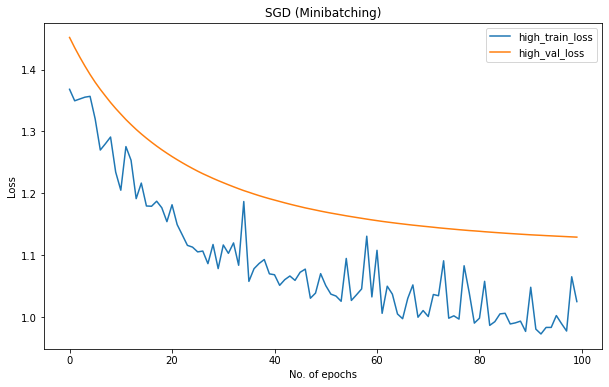

In [129]:
plt.figure(figsize = (10, 6))
plt.plot(high_train_loss_sgd_mb)
plt.plot(high_val_loss_sgd_mb)
plt.legend(["high_train_loss", "high_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("SGD (Minibatching)")
plt.show()

## Defining the dataloader for the rest of the optimizers:

In [130]:
high_train_loader_opt = DataLoader(high_train_dataset, batch_size = 64, shuffle=True)
high_valid_loader_opt = DataLoader(high_valid_dataset, batch_size= len(high_valid_dataset), shuffle=True)
high_test_loader_opt = DataLoader(high_test_dataset, batch_size=len(high_test_dataset), shuffle=True)

## ADAM:
### Adam update rule:
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,   
$ v = \alpha v - \eta * g $,   
$ w = w + v $

In [131]:
high_model_adam = nn.Linear(30, 1)
high_optimizer_adam = torch.optim.Adam(high_model_adam.parameters(), lr = 0.0005)

In [132]:
high_num_epochs_adam = 100
high_train_loss_adam = []
high_val_loss_adam = []

for epoch in range(high_num_epochs_adam):
    high_t_loss_adam = train(high_model_adam, high_train_loader_opt, high_optimizer_adam)
    _,high_v_loss_adam = valid(high_model_adam, high_valid_loader_opt)
    high_train_loss_adam.append(high_t_loss_adam)
    high_val_loss_adam.append(high_v_loss_adam)
    
    print("epoch:",epoch+1,"\n","Training loss:", high_t_loss_adam,"\n","Validation loss:", high_v_loss_adam,"\n")
print("Done")

epoch: 1 
 Training loss: 1.2211223932412953 
 Validation loss: 1.4301338195800781 

epoch: 2 
 Training loss: 1.2049827392284687 
 Validation loss: 1.3902862071990967 

epoch: 3 
 Training loss: 1.1687229229853704 
 Validation loss: 1.3558628559112549 

epoch: 4 
 Training loss: 1.143532565006843 
 Validation loss: 1.327109932899475 

epoch: 5 
 Training loss: 1.1323054937215953 
 Validation loss: 1.3016356229782104 

epoch: 6 
 Training loss: 1.1736279129981995 
 Validation loss: 1.2805827856063843 

epoch: 7 
 Training loss: 1.127127734514383 
 Validation loss: 1.2614251375198364 

epoch: 8 
 Training loss: 1.1357704676114595 
 Validation loss: 1.2452661991119385 

epoch: 9 
 Training loss: 1.0420151696755335 
 Validation loss: 1.2303831577301025 

epoch: 10 
 Training loss: 1.0896620154380798 
 Validation loss: 1.2182563543319702 

epoch: 11 
 Training loss: 1.0509571983264043 
 Validation loss: 1.2072806358337402 

epoch: 12 
 Training loss: 1.0271293612626882 
 Validation loss: 1

epoch: 98 
 Training loss: 0.969632089138031 
 Validation loss: 1.1145191192626953 

epoch: 99 
 Training loss: 0.9744144357167758 
 Validation loss: 1.114582896232605 

epoch: 100 
 Training loss: 0.9619109401336083 
 Validation loss: 1.1145305633544922 

Done


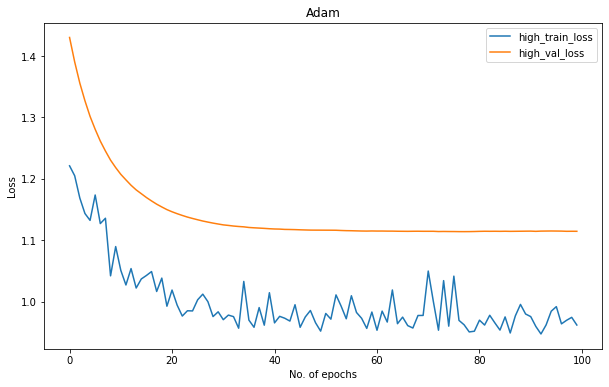

In [133]:
plt.figure(figsize = (10, 6))
plt.plot(high_train_loss_adam)
plt.plot(high_val_loss_adam)
plt.legend(["high_train_loss", "high_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Adam")
plt.show()

## Adagrad:
### Adagrad update rule :
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,   
$ r_t = r_{t-1} + g_t * g_t $,   
$ \hat{\eta} = \eta/(\delta + r_t) $,   
$ w_t = w_{t-1} - \hat{\eta} * g $

In [134]:
high_model_adagrad = nn.Linear(30, 1)
high_optimizer_adagrad = torch.optim.Adagrad(high_model_adagrad.parameters(), lr = 0.0005)

In [135]:
high_num_epochs_adagrad = 100
high_train_loss_adagrad = []
high_val_loss_adagrad = []

for epoch in range(high_num_epochs_adagrad):
    high_t_loss_adagrad = train(high_model_adagrad, high_train_loader_opt, high_optimizer_adagrad)
    _,high_v_loss_adagrad = valid(high_model_adagrad, high_valid_loader_opt)
    high_train_loss_adagrad.append(high_t_loss_adagrad)
    high_val_loss_adagrad.append(high_v_loss_adagrad)
    
    print("epoch:",epoch+1,"\n","Training loss:", high_t_loss_adagrad,"\n","Validation loss:", high_v_loss_adagrad,"\n")
print("Done")

epoch: 1 
 Training loss: 1.4163303145995507 
 Validation loss: 1.58077871799469 

epoch: 2 
 Training loss: 1.4369866389494677 
 Validation loss: 1.5719307661056519 

epoch: 3 
 Training loss: 1.376522563971006 
 Validation loss: 1.5650739669799805 

epoch: 4 
 Training loss: 1.4640433421501746 
 Validation loss: 1.5594818592071533 

epoch: 5 
 Training loss: 1.3830995972339923 
 Validation loss: 1.554561972618103 

epoch: 6 
 Training loss: 1.4360949259537916 
 Validation loss: 1.5500589609146118 

epoch: 7 
 Training loss: 1.3800409848873432 
 Validation loss: 1.5459586381912231 

epoch: 8 
 Training loss: 1.3666041722664466 
 Validation loss: 1.542280912399292 

epoch: 9 
 Training loss: 1.3731732276769786 
 Validation loss: 1.5387775897979736 

epoch: 10 
 Training loss: 1.372033953666687 
 Validation loss: 1.5355236530303955 

epoch: 11 
 Training loss: 1.3697179830991304 
 Validation loss: 1.5324156284332275 

epoch: 12 
 Training loss: 1.3565569244898283 
 Validation loss: 1.52

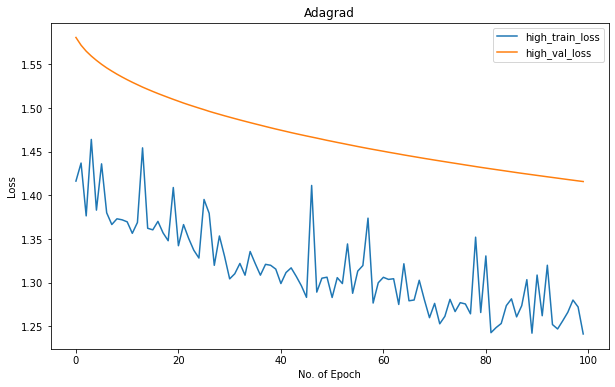

In [136]:
plt.figure(figsize = (10, 6))
plt.plot(high_train_loss_adagrad)
plt.plot(high_val_loss_adagrad)
plt.legend(["high_train_loss", "high_val_loss"])
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("Adagrad")
plt.show()

## RMSProp:
### RMSProp update rule :
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,
$ r_t = \alpha * r_{t-1} + {1- \alpha} * g_t * g_t $,   
$ \hat{\eta} = \eta/\sqrt(\delta + r_t) $,   
$ w_t = w_{t-1} - \hat{\eta} * g $

In [137]:
high_model_rmsprop = nn.Linear(30, 1)
high_optimizer_rmsprop = torch.optim.RMSprop(high_model_rmsprop.parameters(), lr = 0.00005)

In [138]:
high_num_epochs_rmsprop = 100
high_train_loss_rmsprop = []
high_val_loss_rmsprop = []

for epoch in range(high_num_epochs_rmsprop):
    high_t_loss_rmsprop = train(high_model_rmsprop, high_train_loader_opt, high_optimizer_rmsprop)
    _,high_v_loss_rmsprop = valid(high_model_rmsprop, high_valid_loader_opt)
    high_train_loss_rmsprop.append(high_t_loss_rmsprop)
    high_val_loss_rmsprop.append(high_v_loss_rmsprop)
    
    print("epoch:",epoch+1,"\n","Training loss:", high_t_loss_rmsprop,"\n","Validation loss:", high_v_loss_rmsprop,"\n")
print("Done")

epoch: 1 
 Training loss: 1.2607439710543706 
 Validation loss: 1.3441027402877808 

epoch: 2 
 Training loss: 1.2435459677989666 
 Validation loss: 1.3387781381607056 

epoch: 3 
 Training loss: 1.2459003283427312 
 Validation loss: 1.3344324827194214 

epoch: 4 
 Training loss: 1.215638747582069 
 Validation loss: 1.3308717012405396 

epoch: 5 
 Training loss: 1.2186090304301336 
 Validation loss: 1.3276971578598022 

epoch: 6 
 Training loss: 1.2252768874168396 
 Validation loss: 1.3247346878051758 

epoch: 7 
 Training loss: 1.268948467878195 
 Validation loss: 1.3218660354614258 

epoch: 8 
 Training loss: 1.2118001717787523 
 Validation loss: 1.3192777633666992 

epoch: 9 
 Training loss: 1.2607376392071064 
 Validation loss: 1.316588282585144 

epoch: 10 
 Training loss: 1.2394832372665405 
 Validation loss: 1.3143784999847412 

epoch: 11 
 Training loss: 1.2133153401888335 
 Validation loss: 1.3122270107269287 

epoch: 12 
 Training loss: 1.2523830716426556 
 Validation loss: 1

epoch: 100 
 Training loss: 1.0709169369477491 
 Validation loss: 1.2010215520858765 

Done


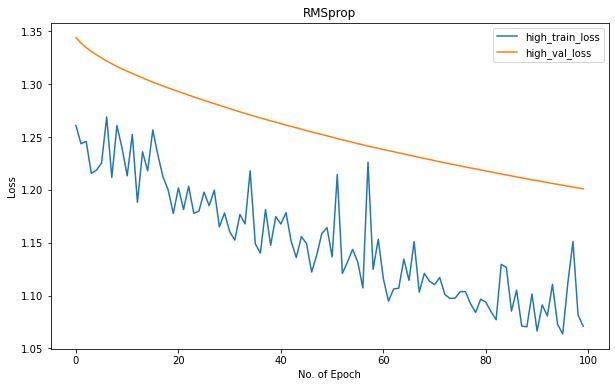

In [139]:
plt.figure(figsize = (10, 6))
plt.plot(high_train_loss_rmsprop)
plt.plot(high_val_loss_rmsprop)
plt.legend(["high_train_loss", "high_val_loss"])
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("RMSprop")
plt.show()

### OBSERVATION :
#### We see that between all the above 4 optimizers, Adam has the highest convergence rate, as the loss obtains the minima the fastest in case of Adam. 
#### Also, we see that the SGD and other optimizers are not performing well as the number of data points are low.

# Regions having medium population, medium white people percentage and medium income:

In [140]:
a5 = np.logical_and(data["TotalPop"] >= 2958.000000, data["TotalPop"] <= 5532.750000) 
a6 = np.logical_and(data["White"] >= 38.100000, data["White"] <= 87.700000)
a7 = np.logical_and(data["Income"] >= 40380.000000, data["Income"] <= 74688.000000)

In [141]:
data1 = data[a5]
data2 = data1[a6]
med_data = data2[a7]
med_data

<ipython-input-141-382b66138feb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = data1[a6]
<ipython-input-141-382b66138feb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med_data = data2[a7]


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2,Alabama,Autauga County,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,43.781388,32.091758,9.237873,2.101507,0.306470,4.7
3,Alabama,Autauga County,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,43.332552,32.846075,8.536513,1.949965,0.000000,6.1
5,Alabama,Autauga County,3620,48.756906,51.243094,3.0,70.7,25.1,0.0,0.0,...,0.7,3.5,8.0,21.1,37.679558,31.650829,5.312818,0.715912,0.000000,6.1
6,Alabama,Autauga County,3420,42.660819,57.339181,4.0,78.0,13.7,0.6,0.0,...,0.0,0.0,0.0,16.4,41.461988,32.091579,7.297310,2.073099,0.000000,16.9
12,Alabama,Baldwin County,3988,54.413240,45.586760,0.3,75.4,18.3,5.1,0.0,...,0.0,2.1,0.7,39.3,40.070211,29.571815,8.174323,2.324072,0.000000,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71820,Wyoming,Sweetwater County,4680,47.136752,52.863248,27.4,71.9,0.2,0.5,0.0,...,0.7,0.5,0.5,24.6,51.858974,42.472500,8.764167,0.622308,0.000000,3.7
71823,Wyoming,Sweetwater County,4219,54.207158,45.792842,20.6,72.2,0.9,0.0,0.4,...,1.9,0.8,1.9,19.0,57.809908,49.427471,7.399668,0.982768,0.000000,6.4
71826,Wyoming,Sweetwater County,3043,51.626684,48.373316,17.7,72.9,1.4,4.1,1.4,...,5.0,1.8,0.9,17.4,44.101216,37.530135,5.821360,0.749721,0.000000,10.1
71828,Wyoming,Sweetwater County,3778,51.058761,48.941239,20.2,76.7,0.3,0.0,1.4,...,2.4,1.6,1.5,21.5,52.620434,37.150026,13.207729,2.262679,0.000000,3.3


In [142]:
cols = list(med_data.columns.values)
cols.pop(cols.index('Income')) 
med_data = med_data[cols+['Income']]
med_data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
2,Alabama,Autauga County,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,...,0.8,1.5,23.1,43.781388,32.091758,9.237873,2.101507,0.30647,4.7,46806.0
3,Alabama,Autauga County,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,...,2.9,2.1,25.9,43.332552,32.846075,8.536513,1.949965,0.00000,6.1,55895.0
5,Alabama,Autauga County,3620,48.756906,51.243094,3.0,70.7,25.1,0.0,0.0,...,3.5,8.0,21.1,37.679558,31.650829,5.312818,0.715912,0.00000,6.1,44549.0
6,Alabama,Autauga County,3420,42.660819,57.339181,4.0,78.0,13.7,0.6,0.0,...,0.0,0.0,16.4,41.461988,32.091579,7.297310,2.073099,0.00000,16.9,41250.0
12,Alabama,Baldwin County,3988,54.413240,45.586760,0.3,75.4,18.3,5.1,0.0,...,2.1,0.7,39.3,40.070211,29.571815,8.174323,2.324072,0.00000,5.8,41387.0


In [143]:
med_data_wi = med_data.drop("Income", axis = 1)

#### CALCULATING THE CORRELATION MATRIX :

In [144]:
med_data_wi_corr = med_data_wi.corr()
med_data_wi_corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,0.008957,-0.008957,0.032713,-0.028401,-0.002616,-0.027198,0.022266,0.019895,-0.072816,...,-0.049484,-0.025732,-0.009399,0.035246,-0.052770,-0.039405,-0.013953,-0.038565,-0.009185,0.017263
Men,0.008957,1.000000,-1.000000,0.096417,-0.043315,-0.049961,0.067438,-0.045481,0.040511,0.023182,...,0.137241,0.083162,0.047284,-0.046948,-0.156327,-0.146428,-0.027930,0.006031,0.015882,0.054780
Women,-0.008957,-1.000000,1.000000,-0.096417,0.043315,0.049961,-0.067438,0.045481,-0.040511,-0.023182,...,-0.137241,-0.083162,-0.047284,0.046948,0.156327,0.146428,0.027930,-0.006031,-0.015882,-0.054780
Hispanic,0.032713,0.096417,-0.096417,1.000000,-0.587841,-0.297018,-0.083415,0.015035,0.054111,-0.482723,...,-0.000448,0.073520,0.018988,0.093341,-0.017459,0.002312,-0.112258,0.106067,0.030949,0.087274
White,-0.028401,-0.043315,0.043315,-0.587841,1.000000,-0.444384,-0.003446,-0.339265,-0.093586,0.441607,...,-0.051852,-0.084777,0.085724,-0.156302,-0.015966,-0.026890,0.002849,0.048319,0.017754,-0.171832
Black,-0.002616,-0.049961,0.049961,-0.297018,-0.444384,1.000000,-0.141222,-0.095452,-0.067145,0.075426,...,-0.052483,-0.051944,-0.161401,0.033705,-0.045203,-0.032646,0.075473,-0.196589,-0.051467,0.121322
Native,-0.027198,0.067438,-0.067438,-0.083415,-0.003446,-0.141222,1.000000,-0.095371,0.026299,0.014398,...,0.004699,0.007976,0.011593,-0.086615,-0.120951,-0.172040,0.121951,0.034183,0.033105,0.026703
Asian,0.022266,-0.045481,0.045481,0.015035,-0.339265,-0.095452,-0.095371,1.000000,0.052293,-0.216859,...,0.202440,0.111977,0.047488,0.188448,0.214129,0.215640,-0.019194,0.022153,-0.022773,-0.037370
Pacific,0.019895,0.040511,-0.040511,0.054111,-0.093586,-0.067145,0.026299,0.052293,1.000000,-0.088881,...,0.007010,0.030811,0.011994,-0.010429,-0.029796,-0.034442,0.015348,-0.002145,-0.014014,0.031095
VotingAgeCitizen,-0.072816,0.023182,-0.023182,-0.482723,0.441607,0.075426,0.014398,-0.216859,-0.088881,1.000000,...,0.093058,0.045360,0.163018,-0.109691,0.102409,0.025093,0.173839,0.065561,-0.000421,-0.056414


In [145]:
upper_triangular_med = med_data_wi_corr.where(np.triu(np.ones(med_data_wi_corr.shape),k=1).astype(np.bool))
print(upper_triangular_med)

                  TotalPop       Men     Women  Hispanic     White     Black  \
TotalPop               NaN  0.008957 -0.008957  0.032713 -0.028401 -0.002616   
Men                    NaN       NaN -1.000000  0.096417 -0.043315 -0.049961   
Women                  NaN       NaN       NaN -0.096417  0.043315  0.049961   
Hispanic               NaN       NaN       NaN       NaN -0.587841 -0.297018   
White                  NaN       NaN       NaN       NaN       NaN -0.444384   
Black                  NaN       NaN       NaN       NaN       NaN       NaN   
Native                 NaN       NaN       NaN       NaN       NaN       NaN   
Asian                  NaN       NaN       NaN       NaN       NaN       NaN   
Pacific                NaN       NaN       NaN       NaN       NaN       NaN   
VotingAgeCitizen       NaN       NaN       NaN       NaN       NaN       NaN   
IncomeErr              NaN       NaN       NaN       NaN       NaN       NaN   
IncomePerCap           NaN       NaN    

<ipython-input-145-5f7c0f5f8599>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular_med = med_data_wi_corr.where(np.triu(np.ones(med_data_wi_corr.shape),k=1).astype(np.bool))


#### CHECKING AND REMOVING THE COLUMNS HAVING CORRELATION > 0.8 :

In [146]:
drop_col_med = [column for column in upper_triangular_med.columns if any(upper_triangular_med[column] > 0.8)]
print(drop_col_med)

['PrivateWork']


In [147]:
data_med_cl = med_data.drop(drop_col_med, axis = 1)
data_med_cl

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
2,Alabama,Autauga County,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,43.781388,9.237873,2.101507,0.306470,4.7,46806.0
3,Alabama,Autauga County,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,43.332552,8.536513,1.949965,0.000000,6.1,55895.0
5,Alabama,Autauga County,3620,48.756906,51.243094,3.0,70.7,25.1,0.0,0.0,...,0.7,3.5,8.0,21.1,37.679558,5.312818,0.715912,0.000000,6.1,44549.0
6,Alabama,Autauga County,3420,42.660819,57.339181,4.0,78.0,13.7,0.6,0.0,...,0.0,0.0,0.0,16.4,41.461988,7.297310,2.073099,0.000000,16.9,41250.0
12,Alabama,Baldwin County,3988,54.413240,45.586760,0.3,75.4,18.3,5.1,0.0,...,0.0,2.1,0.7,39.3,40.070211,8.174323,2.324072,0.000000,5.8,41387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71820,Wyoming,Sweetwater County,4680,47.136752,52.863248,27.4,71.9,0.2,0.5,0.0,...,0.7,0.5,0.5,24.6,51.858974,8.764167,0.622308,0.000000,3.7,64000.0
71823,Wyoming,Sweetwater County,4219,54.207158,45.792842,20.6,72.2,0.9,0.0,0.4,...,1.9,0.8,1.9,19.0,57.809908,7.399668,0.982768,0.000000,6.4,42286.0
71826,Wyoming,Sweetwater County,3043,51.626684,48.373316,17.7,72.9,1.4,4.1,1.4,...,5.0,1.8,0.9,17.4,44.101216,5.821360,0.749721,0.000000,10.1,68967.0
71828,Wyoming,Sweetwater County,3778,51.058761,48.941239,20.2,76.7,0.3,0.0,1.4,...,2.4,1.6,1.5,21.5,52.620434,13.207729,2.262679,0.000000,3.3,56705.0


#### STANDARDIZING THE DATA :

In [148]:
scaler = StandardScaler()
X_med = scaler.fit_transform(data_med_cl.iloc[:,3:-1].values)
y_med = scaler.fit_transform(data_med_cl[['Income']])
y_med = np.array(y_med)
y_med = y_med.reshape((9435,))

print(X_med.shape, y_med.shape)

(9435, 31) (9435,)


#### TRAIN-VALIDATION-TEST SPLIT :

In [149]:
X_med_train, X_med_test, y_med_train, y_med_test = train_test_split(X_med, y_med, test_size = 0.20)
X_med_train, X_med_val, y_med_train, y_med_val = train_test_split(X_med_train, y_med_train, test_size = 0.20)

print(f"X_train:{X_med_train.shape}\ny_train:{y_med_train.shape}")
print(f"X_test:{X_med_test.shape}")
print(f"y_test:{y_med_test.shape}")
print(f"X_val:{X_med_val.shape}")
print(f"y_val:{y_med_val.shape}")

X_train:(6038, 31)
y_train:(6038,)
X_test:(1887, 31)
y_test:(1887,)
X_val:(1510, 31)
y_val:(1510,)


In [150]:
res_med = sm.OLS(y_med_train, X_med_train).fit()
print(res_med.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.561
Model:                            OLS   Adj. R-squared (uncentered):              0.559
Method:                 Least Squares   F-statistic:                              255.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:18:08   Log-Likelihood:                         -6043.7
No. Observations:                6038   AIC:                                  1.215e+04
Df Residuals:                    6008   BIC:                                  1.235e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### APPLYING LINEAR MODEL AND CALCULATING THE TRAIN AND TEST SCORES :

In [151]:
model = LinearRegression()
model.fit(X_med_train, y_med_train)
y_med_pred_test = model.predict(X_med_test)
y_med_pred_train  =  model.predict(X_med_train)
mean_squared_error(y_med_test, y_med_pred_test), mean_absolute_error(y_med_test, y_med_pred_test) 
train_score_med = r2_score(y_med_train, y_med_pred_train)
test_score_med = r2_score(y_med_test, y_med_pred_test)
train_score_med, test_score_med

(0.5609087952670403, 0.5563554849060918)

#### CONVERSION TO PYTORCH :

In [152]:
X_med_train = torch.from_numpy(X_med_train.astype(np.float32))
y_med_train = torch.from_numpy(y_med_train.astype(np.float32))
X_med_val = torch.from_numpy(X_med_val.astype(np.float32))
y_med_val = torch.from_numpy(y_med_val.astype(np.float32))
X_med_test = torch.from_numpy(X_med_test.astype(np.float32))
y_med_test = torch.from_numpy(y_med_test.astype(np.float32))

In [153]:
med_train_dataset = TensorDataset(X_med_train, y_med_train)
med_test_dataset = TensorDataset(X_med_test, y_med_test)
med_valid_dataset = TensorDataset(X_med_val, y_med_val)

#### DEFINING THE TRAIN AND VALIDATION MODELS :

In [154]:
def train(model,train_loader,optimizer):
    train_loss=[]
    model.train()
    for i, (x,y) in enumerate(train_loader):
        y_pred = model(x.requires_grad_())
        loss= l(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss.append(loss.item())
    return np.mean(train_loss)

In [155]:
def valid(model,valid_loader):
    valid_loss=[]
    model.eval()
    for i, (x,y) in enumerate(valid_loader):
        y_pred=model(x)
        loss=l(y_pred,y)
        valid_loss.append(loss.item())
    return y_pred,np.mean(valid_loss)

## GD (For whole training dataset):
#### Equation of gradient descent algorithm :
$ {\displaystyle \mathbf {x} _{n+1}=\mathbf {x} _{n}-\alpha \nabla f(\mathbf {x} _{n})} $

In [156]:
med_train_loader = DataLoader(med_train_dataset, batch_size = len(med_train_dataset), shuffle=True)
med_valid_loader = DataLoader(med_valid_dataset, batch_size= len(med_valid_dataset), shuffle=True)
med_test_loader = DataLoader(med_test_dataset, batch_size=len(med_test_dataset), shuffle=True)

In [157]:
l = nn.MSELoss()

In [158]:
med_model_gd = nn.Linear(31, 1)
med_optimizer_gd = torch.optim.SGD(med_model_gd.parameters(), lr = 0.0005)

In [159]:
med_num_epochs_gd = 1000
med_train_loss_gd = []
med_val_loss_gd = []

for epoch in range(med_num_epochs_gd):
    med_t_loss_gd = train(med_model_gd, med_train_loader, med_optimizer_gd)
    _,med_v_loss_gd = valid(med_model_gd, med_valid_loader)
    med_train_loss_gd.append(med_t_loss_gd)
    med_val_loss_gd.append(med_v_loss_gd)
    print("epoch:",epoch+1,"\n","Training loss:", med_t_loss_gd,"\n","Validation loss:",med_v_loss_gd,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6038])) that is different to the input size (torch.Size([6038, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1510])) that is different to the input size (torch.Size([1510, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 1.3269883394241333 
 Validation loss: 1.3631134033203125 

epoch: 2 
 Training loss: 1.3258804082870483 
 Validation loss: 1.3620790243148804 

epoch: 3 
 Training loss: 1.3247778415679932 
 Validation loss: 1.3610495328903198 

epoch: 4 
 Training loss: 1.3236807584762573 
 Validation loss: 1.36002516746521 

epoch: 5 
 Training loss: 1.3225890398025513 
 Validation loss: 1.3590054512023926 

epoch: 6 
 Training loss: 1.321502685546875 
 Validation loss: 1.3579907417297363 

epoch: 7 
 Training loss: 1.3204214572906494 
 Validation loss: 1.356980800628662 

epoch: 8 
 Training loss: 1.3193458318710327 
 Validation loss: 1.3559757471084595 

epoch: 9 
 Training loss: 1.3182752132415771 
 Validation loss: 1.3549752235412598 

epoch: 10 
 Training loss: 1.3172098398208618 
 Validation loss: 1.3539795875549316 

epoch: 11 
 Training loss: 1.3161495923995972 
 Validation loss: 1.352988600730896 

epoch: 12 
 Training loss: 1.3150947093963623 
 Validation loss: 1.3

epoch: 97 
 Training loss: 1.2411237955093384 
 Validation loss: 1.282450556755066 

epoch: 98 
 Training loss: 1.2404074668884277 
 Validation loss: 1.2817727327346802 

epoch: 99 
 Training loss: 1.2396941184997559 
 Validation loss: 1.281097650527954 

epoch: 100 
 Training loss: 1.2389836311340332 
 Validation loss: 1.2804254293441772 

epoch: 101 
 Training loss: 1.2382761240005493 
 Validation loss: 1.2797555923461914 

epoch: 102 
 Training loss: 1.2375715970993042 
 Validation loss: 1.2790888547897339 

epoch: 103 
 Training loss: 1.2368699312210083 
 Validation loss: 1.278424620628357 

epoch: 104 
 Training loss: 1.2361711263656616 
 Validation loss: 1.277762770652771 

epoch: 105 
 Training loss: 1.2354753017425537 
 Validation loss: 1.2771039009094238 

epoch: 106 
 Training loss: 1.2347822189331055 
 Validation loss: 1.2764475345611572 

epoch: 107 
 Training loss: 1.2340919971466064 
 Validation loss: 1.2757937908172607 

epoch: 108 
 Training loss: 1.2334046363830566 
 V

epoch: 192 
 Training loss: 1.1842879056930542 
 Validation loss: 1.2283976078033447 

epoch: 193 
 Training loss: 1.183791160583496 
 Validation loss: 1.2279225587844849 

epoch: 194 
 Training loss: 1.1832959651947021 
 Validation loss: 1.2274491786956787 

epoch: 195 
 Training loss: 1.1828025579452515 
 Validation loss: 1.2269774675369263 

epoch: 196 
 Training loss: 1.1823110580444336 
 Validation loss: 1.226507306098938 

epoch: 197 
 Training loss: 1.181821346282959 
 Validation loss: 1.2260388135910034 

epoch: 198 
 Training loss: 1.1813331842422485 
 Validation loss: 1.2255717515945435 

epoch: 199 
 Training loss: 1.1808468103408813 
 Validation loss: 1.2251064777374268 

epoch: 200 
 Training loss: 1.1803621053695679 
 Validation loss: 1.2246427536010742 

epoch: 201 
 Training loss: 1.1798789501190186 
 Validation loss: 1.2241805791854858 

epoch: 202 
 Training loss: 1.1793978214263916 
 Validation loss: 1.2237200736999512 

epoch: 203 
 Training loss: 1.1789183616638184

epoch: 287 
 Training loss: 1.1439119577407837 
 Validation loss: 1.1896554231643677 

epoch: 288 
 Training loss: 1.1435503959655762 
 Validation loss: 1.1893070936203003 

epoch: 289 
 Training loss: 1.143189787864685 
 Validation loss: 1.1889599561691284 

epoch: 290 
 Training loss: 1.1428302526474 
 Validation loss: 1.188613772392273 

epoch: 291 
 Training loss: 1.1424719095230103 
 Validation loss: 1.1882686614990234 

epoch: 292 
 Training loss: 1.1421147584915161 
 Validation loss: 1.1879246234893799 

epoch: 293 
 Training loss: 1.1417585611343384 
 Validation loss: 1.1875817775726318 

epoch: 294 
 Training loss: 1.1414034366607666 
 Validation loss: 1.1872397661209106 

epoch: 295 
 Training loss: 1.1410496234893799 
 Validation loss: 1.1868990659713745 

epoch: 296 
 Training loss: 1.1406967639923096 
 Validation loss: 1.1865592002868652 

epoch: 297 
 Training loss: 1.1403450965881348 
 Validation loss: 1.1862202882766724 

epoch: 298 
 Training loss: 1.1399943828582764 


epoch: 382 
 Training loss: 1.1140085458755493 
 Validation loss: 1.160810947418213 

epoch: 383 
 Training loss: 1.1137360334396362 
 Validation loss: 1.1605476140975952 

epoch: 384 
 Training loss: 1.113464117050171 
 Validation loss: 1.1602849960327148 

epoch: 385 
 Training loss: 1.113193392753601 
 Validation loss: 1.1600229740142822 

epoch: 386 
 Training loss: 1.1129227876663208 
 Validation loss: 1.1597620248794556 

epoch: 387 
 Training loss: 1.112653374671936 
 Validation loss: 1.1595016717910767 

epoch: 388 
 Training loss: 1.1123846769332886 
 Validation loss: 1.1592421531677246 

epoch: 389 
 Training loss: 1.1121166944503784 
 Validation loss: 1.1589831113815308 

epoch: 390 
 Training loss: 1.1118495464324951 
 Validation loss: 1.1587247848510742 

epoch: 391 
 Training loss: 1.1115829944610596 
 Validation loss: 1.158467411994934 

epoch: 392 
 Training loss: 1.1113172769546509 
 Validation loss: 1.1582107543945312 

epoch: 393 
 Training loss: 1.1110522747039795 


epoch: 477 
 Training loss: 1.091201901435852 
 Validation loss: 1.1387666463851929 

epoch: 478 
 Training loss: 1.0909916162490845 
 Validation loss: 1.1385631561279297 

epoch: 479 
 Training loss: 1.0907816886901855 
 Validation loss: 1.1383602619171143 

epoch: 480 
 Training loss: 1.0905723571777344 
 Validation loss: 1.1381579637527466 

epoch: 481 
 Training loss: 1.0903635025024414 
 Validation loss: 1.1379562616348267 

epoch: 482 
 Training loss: 1.0901553630828857 
 Validation loss: 1.1377549171447754 

epoch: 483 
 Training loss: 1.0899475812911987 
 Validation loss: 1.1375541687011719 

epoch: 484 
 Training loss: 1.089740514755249 
 Validation loss: 1.1373538970947266 

epoch: 485 
 Training loss: 1.0895339250564575 
 Validation loss: 1.1371543407440186 

epoch: 486 
 Training loss: 1.0893278121948242 
 Validation loss: 1.1369550228118896 

epoch: 487 
 Training loss: 1.0891224145889282 
 Validation loss: 1.1367563009262085 

epoch: 488 
 Training loss: 1.088917374610900

epoch: 572 
 Training loss: 1.0734409093856812 
 Validation loss: 1.1216059923171997 

epoch: 573 
 Training loss: 1.0732756853103638 
 Validation loss: 1.1214464902877808 

epoch: 574 
 Training loss: 1.0731106996536255 
 Validation loss: 1.121287226676941 

epoch: 575 
 Training loss: 1.0729461908340454 
 Validation loss: 1.1211284399032593 

epoch: 576 
 Training loss: 1.072782039642334 
 Validation loss: 1.1209701299667358 

epoch: 577 
 Training loss: 1.0726184844970703 
 Validation loss: 1.1208120584487915 

epoch: 578 
 Training loss: 1.0724550485610962 
 Validation loss: 1.1206543445587158 

epoch: 579 
 Training loss: 1.0722922086715698 
 Validation loss: 1.1204971075057983 

epoch: 580 
 Training loss: 1.072129726409912 
 Validation loss: 1.120340347290039 

epoch: 581 
 Training loss: 1.071967601776123 
 Validation loss: 1.1201839447021484 

epoch: 582 
 Training loss: 1.0718059539794922 
 Validation loss: 1.1200278997421265 

epoch: 583 
 Training loss: 1.07164466381073 
 V

epoch: 667 
 Training loss: 1.0593938827514648 
 Validation loss: 1.1080628633499146 

epoch: 668 
 Training loss: 1.0592622756958008 
 Validation loss: 1.107936143875122 

epoch: 669 
 Training loss: 1.0591310262680054 
 Validation loss: 1.1078096628189087 

epoch: 670 
 Training loss: 1.0589998960494995 
 Validation loss: 1.107683539390564 

epoch: 671 
 Training loss: 1.0588692426681519 
 Validation loss: 1.1075576543807983 

epoch: 672 
 Training loss: 1.0587387084960938 
 Validation loss: 1.107432246208191 

epoch: 673 
 Training loss: 1.0586087703704834 
 Validation loss: 1.1073070764541626 

epoch: 674 
 Training loss: 1.058478832244873 
 Validation loss: 1.1071820259094238 

epoch: 675 
 Training loss: 1.058349370956421 
 Validation loss: 1.1070575714111328 

epoch: 676 
 Training loss: 1.0582201480865479 
 Validation loss: 1.1069331169128418 

epoch: 677 
 Training loss: 1.058091163635254 
 Validation loss: 1.106809139251709 

epoch: 678 
 Training loss: 1.0579626560211182 
 V

epoch: 762 
 Training loss: 1.0481493473052979 
 Validation loss: 1.0972574949264526 

epoch: 763 
 Training loss: 1.0480432510375977 
 Validation loss: 1.0971558094024658 

epoch: 764 
 Training loss: 1.0479376316070557 
 Validation loss: 1.097054362297058 

epoch: 765 
 Training loss: 1.0478321313858032 
 Validation loss: 1.096953272819519 

epoch: 766 
 Training loss: 1.0477269887924194 
 Validation loss: 1.096852421760559 

epoch: 767 
 Training loss: 1.0476218461990356 
 Validation loss: 1.0967516899108887 

epoch: 768 
 Training loss: 1.0475170612335205 
 Validation loss: 1.0966511964797974 

epoch: 769 
 Training loss: 1.0474125146865845 
 Validation loss: 1.0965510606765747 

epoch: 770 
 Training loss: 1.047308325767517 
 Validation loss: 1.0964510440826416 

epoch: 771 
 Training loss: 1.0472041368484497 
 Validation loss: 1.0963512659072876 

epoch: 772 
 Training loss: 1.047100305557251 
 Validation loss: 1.0962517261505127 

epoch: 773 
 Training loss: 1.046996831893921 
 

epoch: 857 
 Training loss: 1.0390578508377075 
 Validation loss: 1.0885566473007202 

epoch: 858 
 Training loss: 1.0389716625213623 
 Validation loss: 1.0884743928909302 

epoch: 859 
 Training loss: 1.0388858318328857 
 Validation loss: 1.0883923768997192 

epoch: 860 
 Training loss: 1.0388001203536987 
 Validation loss: 1.088310718536377 

epoch: 861 
 Training loss: 1.0387146472930908 
 Validation loss: 1.0882290601730347 

epoch: 862 
 Training loss: 1.0386292934417725 
 Validation loss: 1.0881476402282715 

epoch: 863 
 Training loss: 1.0385440587997437 
 Validation loss: 1.0880663394927979 

epoch: 864 
 Training loss: 1.038459062576294 
 Validation loss: 1.0879851579666138 

epoch: 865 
 Training loss: 1.0383743047714233 
 Validation loss: 1.0879042148590088 

epoch: 866 
 Training loss: 1.0382896661758423 
 Validation loss: 1.087823510169983 

epoch: 867 
 Training loss: 1.0382052659988403 
 Validation loss: 1.0877429246902466 

epoch: 868 
 Training loss: 1.0381211042404175

epoch: 952 
 Training loss: 1.0316431522369385 
 Validation loss: 1.0814929008483887 

epoch: 953 
 Training loss: 1.031572699546814 
 Validation loss: 1.0814257860183716 

epoch: 954 
 Training loss: 1.0315022468566895 
 Validation loss: 1.0813589096069336 

epoch: 955 
 Training loss: 1.031432032585144 
 Validation loss: 1.0812922716140747 

epoch: 956 
 Training loss: 1.0313620567321777 
 Validation loss: 1.0812257528305054 

epoch: 957 
 Training loss: 1.0312920808792114 
 Validation loss: 1.081159234046936 

epoch: 958 
 Training loss: 1.0312222242355347 
 Validation loss: 1.0810930728912354 

epoch: 959 
 Training loss: 1.0311527252197266 
 Validation loss: 1.0810269117355347 

epoch: 960 
 Training loss: 1.031083345413208 
 Validation loss: 1.0809608697891235 

epoch: 961 
 Training loss: 1.0310139656066895 
 Validation loss: 1.0808950662612915 

epoch: 962 
 Training loss: 1.0309447050094604 
 Validation loss: 1.0808292627334595 

epoch: 963 
 Training loss: 1.030875563621521 


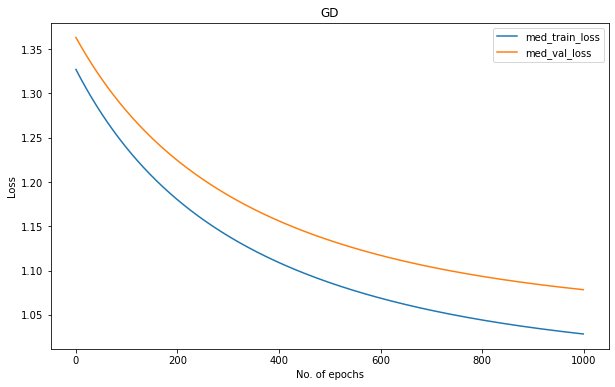

In [160]:
plt.figure(figsize = (10, 6))
plt.plot(med_train_loss_gd)
plt.plot(med_val_loss_gd)
plt.legend(["med_train_loss", "med_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("GD")
plt.show()

## REASON FOR USING SGD AND OTHER OPTIMIZERS :
#### SGD and other optimizers, which are used below, increase the convergence rate so that the loss gets minimized faster. In GD above, we see that the decrease in loss is steady but it is taking a lot of epochs to achieve the global minima.
#### Here, we will be comparing the convergence rates of the optimizers we are going to apply.
#### At first, we will be applying vanilla SGD

# SGD:
#### Equation for vanilla SGD algorithm :
$ {\displaystyle \mathbf {x} _{n+1}^t = \mathbf {x} _{n}^t - \gamma \nabla f(\mathbf {x} _{n}^t)} $

In [161]:
med_train_loader_sgd = DataLoader(med_train_dataset, batch_size = 1, shuffle=True)
med_valid_loader_sgd = DataLoader(med_valid_dataset, batch_size= len(med_valid_dataset), shuffle=True)
med_test_loader_sgd = DataLoader(med_test_dataset, batch_size=len(med_test_dataset), shuffle=True)

In [162]:
med_model_sgd = nn.Linear(31 , 1)
med_optimizer_sgd = torch.optim.SGD(med_model_sgd.parameters(), lr = 0.0005)

In [163]:
med_num_epochs_sgd = 50
med_train_loss_sgd = []
med_val_loss_sgd = []

for epoch in range(med_num_epochs_sgd):
    med_t_loss_sgd = train(med_model_sgd, med_train_loader_sgd, med_optimizer_sgd)
    _,med_v_loss_sgd = valid(med_model_sgd, med_valid_loader_sgd)
    med_train_loss_sgd.append(med_t_loss_sgd)
    med_val_loss_sgd.append(med_v_loss_sgd)
    print("epoch:",epoch+1,"\n","Training loss:", med_t_loss_sgd,"\n","Validation loss:", med_v_loss_sgd,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 0.5248037343905801 
 Validation loss: 1.556391954421997 

epoch: 2 
 Training loss: 0.4481039941118837 
 Validation loss: 1.6245142221450806 

epoch: 3 
 Training loss: 0.4447875241781064 
 Validation loss: 1.5512858629226685 

epoch: 4 
 Training loss: 0.44274825261011896 
 Validation loss: 1.5359681844711304 

epoch: 5 
 Training loss: 0.44566586602392133 
 Validation loss: 1.5568280220031738 

epoch: 6 
 Training loss: 0.4442769410900515 
 Validation loss: 1.5821068286895752 

epoch: 7 
 Training loss: 0.44299183191336355 
 Validation loss: 1.574661374092102 

epoch: 8 
 Training loss: 0.4445268597810567 
 Validation loss: 1.5955003499984741 

epoch: 9 
 Training loss: 0.44325683984021974 
 Validation loss: 1.6008270978927612 

epoch: 10 
 Training loss: 0.44411308630392377 
 Validation loss: 1.5816739797592163 

epoch: 11 
 Training loss: 0.44356481191911357 
 Validation loss: 1.538864016532898 

epoch: 12 
 Training loss: 0.4444124213081379 
 Validation l

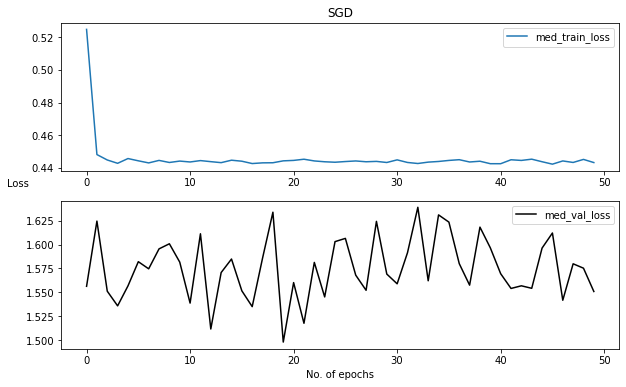

In [164]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
ax[0].plot(med_train_loss_sgd)
ax[0].legend(["med_train_loss"])
ax[0].title.set_text('SGD')
ax[1].plot(med_val_loss_sgd, "k-")
ax[1].legend(["med_val_loss"])
plt.xlabel("No. of epochs")
fig.text(0.05, 0.5, "Loss")
plt.show()

### OBSERVATION :
#### We see that the validation loss function is oscillating and non-decreasing. So, we shift to other optimizers 

# SGD (Minibatching):
### SGD Minibatching update rule :
$ {\displaystyle \mathbf {x} _{n+1}^j = \mathbf {x} _{n}^j - \alpha/p \sum \limits _{j =1}^{p} \nabla f(\mathbf {x} _{n}^j)} $

In [165]:
med_train_loader_sgd_mb = DataLoader(med_train_dataset, batch_size = 64, shuffle=True)
med_valid_loader_sgd_mb = DataLoader(med_valid_dataset, batch_size= len(med_valid_dataset), shuffle=True)
med_test_loader_sgd_mb = DataLoader(med_test_dataset, batch_size=len(med_test_dataset), shuffle=True)

In [166]:
med_model_sgd_mb = nn.Linear(31 , 1)
med_optimizer_sgd_mb = torch.optim.SGD(med_model_sgd_mb.parameters(), lr = 0.0005)

In [167]:
med_num_epochs_sgd_mb = 100
med_train_loss_sgd_mb = []
med_val_loss_sgd_mb = []

for epoch in range(med_num_epochs_sgd_mb):
    med_t_loss_sgd_mb = train(med_model_sgd_mb, med_train_loader_sgd_mb, med_optimizer_sgd_mb)
    _,med_v_loss_sgd_mb = valid(med_model_sgd_mb, med_valid_loader_sgd_mb)
    med_train_loss_sgd_mb.append(med_t_loss_sgd_mb)
    med_val_loss_sgd_mb.append(med_v_loss_sgd_mb)
    print("epoch:",epoch+1,"\n","Training loss:", med_t_loss_sgd_mb,"\n","Validation loss:", med_v_loss_sgd_mb,"\n")
print("Done")

C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RAKTIMA\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1 
 Training loss: 1.3017769424538863 
 Validation loss: 1.2777774333953857 

epoch: 2 
 Training loss: 1.203289751002663 
 Validation loss: 1.2133333683013916 

epoch: 3 
 Training loss: 1.1473627843354877 
 Validation loss: 1.1720516681671143 

epoch: 4 
 Training loss: 1.1124215759729084 
 Validation loss: 1.1437889337539673 

epoch: 5 
 Training loss: 1.0831728602710524 
 Validation loss: 1.1231396198272705 

epoch: 6 
 Training loss: 1.0634631056534616 
 Validation loss: 1.1076960563659668 

epoch: 7 
 Training loss: 1.0514982643880342 
 Validation loss: 1.0955321788787842 

epoch: 8 
 Training loss: 1.042070586430399 
 Validation loss: 1.086012363433838 

epoch: 9 
 Training loss: 1.0315808816959984 
 Validation loss: 1.0785107612609863 

epoch: 10 
 Training loss: 1.0234897519412793 
 Validation loss: 1.0725113153457642 

epoch: 11 
 Training loss: 1.0181078559473942 
 Validation loss: 1.0677258968353271 

epoch: 12 
 Training loss: 1.013999785247602 
 Validation loss: 1.

epoch: 97 
 Training loss: 0.9876651029837759 
 Validation loss: 1.0404818058013916 

epoch: 98 
 Training loss: 0.9843197213976007 
 Validation loss: 1.0404727458953857 

epoch: 99 
 Training loss: 0.9874844670295715 
 Validation loss: 1.0404930114746094 

epoch: 100 
 Training loss: 0.9877910783416346 
 Validation loss: 1.040481686592102 

Done


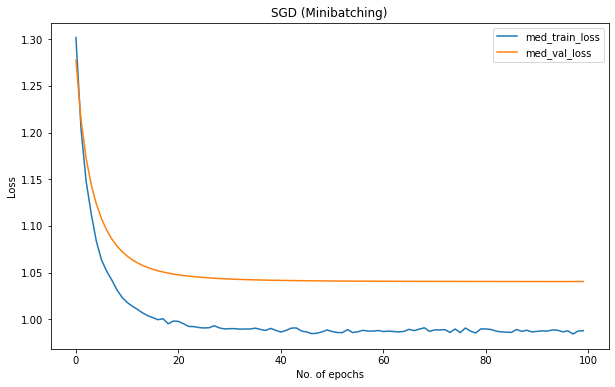

In [168]:
plt.figure(figsize = (10, 6))
plt.plot(med_train_loss_sgd_mb)
plt.plot(med_val_loss_sgd_mb)
plt.legend(["med_train_loss", "med_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("SGD (Minibatching)")
plt.show()

## Defining the dataloader for the rest of the optimizers:

In [169]:
med_train_loader_opt = DataLoader(med_train_dataset, batch_size = 64, shuffle=True)
med_valid_loader_opt = DataLoader(med_valid_dataset, batch_size= len(med_valid_dataset), shuffle=True)
med_test_loader_opt = DataLoader(med_test_dataset, batch_size=len(med_test_dataset), shuffle=True)

## ADAM:
### Adam update rule:
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,   
$ v = \alpha v - \eta * g $,   
$ w = w + v $

In [170]:
med_model_adam = nn.Linear(31, 1)
med_optimizer_adam = torch.optim.Adam(med_model_adam.parameters(), lr = 0.0005)

In [171]:
med_num_epochs_adam = 100
med_train_loss_adam = []
med_val_loss_adam = []

for epoch in range(med_num_epochs_adam):
    med_t_loss_adam = train(med_model_adam, med_train_loader_opt, med_optimizer_adam)
    _,med_v_loss_adam = valid(med_model_adam, med_valid_loader_opt)
    med_train_loss_adam.append(med_t_loss_adam)
    med_val_loss_adam.append(med_v_loss_adam)
    
    print("epoch:",epoch+1,"\n","Training loss:", med_t_loss_adam,"\n","Validation loss:", med_v_loss_adam,"\n")
print("Done")

epoch: 1 
 Training loss: 1.120898620078438 
 Validation loss: 1.1101826429367065 

epoch: 2 
 Training loss: 1.0394116326382286 
 Validation loss: 1.0728827714920044 

epoch: 3 
 Training loss: 1.0145192980766295 
 Validation loss: 1.0564568042755127 

epoch: 4 
 Training loss: 0.9996325480310541 
 Validation loss: 1.0480281114578247 

epoch: 5 
 Training loss: 0.9905231438185039 
 Validation loss: 1.0440187454223633 

epoch: 6 
 Training loss: 0.988766788808923 
 Validation loss: 1.0419970750808716 

epoch: 7 
 Training loss: 0.9919751135926498 
 Validation loss: 1.0411534309387207 

epoch: 8 
 Training loss: 0.9902507549838016 
 Validation loss: 1.040658712387085 

epoch: 9 
 Training loss: 0.9874502458070454 
 Validation loss: 1.0403622388839722 

epoch: 10 
 Training loss: 0.985892757616545 
 Validation loss: 1.0403517484664917 

epoch: 11 
 Training loss: 0.9851266440592314 
 Validation loss: 1.0404165983200073 

epoch: 12 
 Training loss: 0.9851064468684949 
 Validation loss: 1.

epoch: 98 
 Training loss: 0.9864835268572757 
 Validation loss: 1.0404505729675293 

epoch: 99 
 Training loss: 0.9871993698571858 
 Validation loss: 1.040420413017273 

epoch: 100 
 Training loss: 0.9865691084610788 
 Validation loss: 1.0404373407363892 

Done


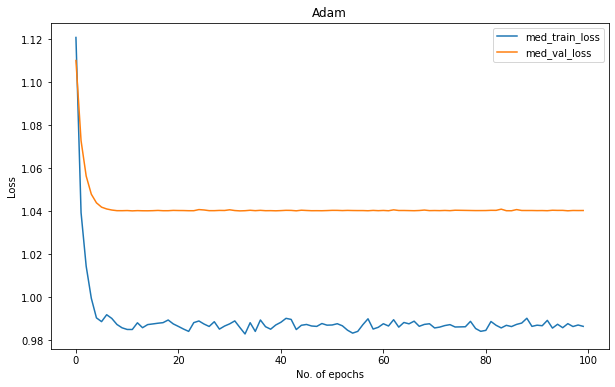

In [172]:
plt.figure(figsize = (10, 6))
plt.plot(med_train_loss_adam)
plt.plot(med_val_loss_adam)
plt.legend(["med_train_loss", "med_val_loss"])
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Adam")
plt.show()

## Adagrad:
### Adagrad update rule :
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,   
$ r_t = r_{t-1} + g_t * g_t $,   
$ \hat{\eta} = \eta/(\delta + r_t) $,   
$ w_t = w_{t-1} - \hat{\eta} * g $

In [173]:
med_model_adagrad = nn.Linear(31, 1)
med_optimizer_adagrad = torch.optim.Adagrad(med_model_adagrad.parameters(), lr = 0.0005)

In [174]:
med_num_epochs_adagrad = 100
med_train_loss_adagrad = []
med_val_loss_adagrad = []

for epoch in range(med_num_epochs_adagrad):
    med_t_loss_adagrad = train(med_model_adagrad, med_train_loader_opt, med_optimizer_adagrad)
    _,med_v_loss_adagrad = valid(med_model_adagrad, med_valid_loader_opt)
    med_train_loss_adagrad.append(med_t_loss_adagrad)
    med_val_loss_adagrad.append(med_v_loss_adagrad)
    
    print("epoch:",epoch+1,"\n","Training loss:", med_t_loss_adagrad,"\n","Validation loss:", med_v_loss_adagrad,"\n")
print("Done")

epoch: 1 
 Training loss: 1.2635317576558966 
 Validation loss: 1.2985459566116333 

epoch: 2 
 Training loss: 1.2385470038966129 
 Validation loss: 1.2849186658859253 

epoch: 3 
 Training loss: 1.2319974591857508 
 Validation loss: 1.2749897241592407 

epoch: 4 
 Training loss: 1.2237132235577233 
 Validation loss: 1.2668250799179077 

epoch: 5 
 Training loss: 1.2159064236440156 
 Validation loss: 1.259871482849121 

epoch: 6 
 Training loss: 1.2074251149830064 
 Validation loss: 1.2538070678710938 

epoch: 7 
 Training loss: 1.2028588307531256 
 Validation loss: 1.2483978271484375 

epoch: 8 
 Training loss: 1.1987856965315968 
 Validation loss: 1.2434934377670288 

epoch: 9 
 Training loss: 1.190247178705115 
 Validation loss: 1.2389588356018066 

epoch: 10 
 Training loss: 1.1850557082577755 
 Validation loss: 1.2347873449325562 

epoch: 11 
 Training loss: 1.1876277070296437 
 Validation loss: 1.2308682203292847 

epoch: 12 
 Training loss: 1.1801528140118247 
 Validation loss: 

epoch: 97 
 Training loss: 1.0652058601379395 
 Validation loss: 1.1160293817520142 

epoch: 98 
 Training loss: 1.0637335375735635 
 Validation loss: 1.1154530048370361 

epoch: 99 
 Training loss: 1.0658395823679472 
 Validation loss: 1.1148715019226074 

epoch: 100 
 Training loss: 1.0658777255760996 
 Validation loss: 1.114297866821289 

Done


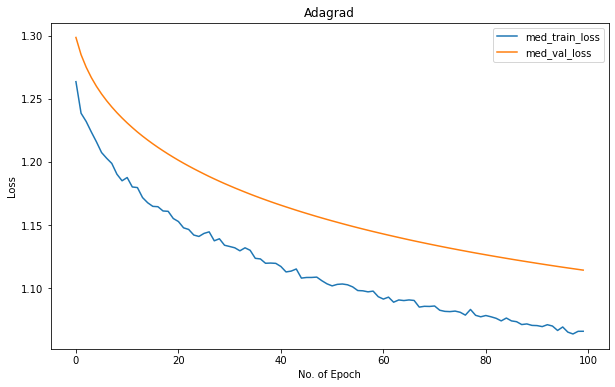

In [175]:
plt.figure(figsize = (10, 6))
plt.plot(med_train_loss_adagrad)
plt.plot(med_val_loss_adagrad)
plt.legend(["med_train_loss", "med_val_loss"])
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("Adagrad")
plt.show()

## RMSProp:
### RMSProp update rule :
$ L = {1/m_1}\sum \limits _{i =1}^{m_1} L_i $,   
$ g = \nabla_w L $,
$ r_t = \alpha * r_{t-1} + {1- \alpha} * g_t * g_t $,   
$ \hat{\eta} = \eta/\sqrt(\delta + r_t) $,   
$ w_t = w_{t-1} - \hat{\eta} * g $

In [176]:
med_model_rmsprop = nn.Linear(31, 1)
med_optimizer_rmsprop = torch.optim.RMSprop(med_model_rmsprop.parameters(), lr = 0.00005)

In [177]:
med_num_epochs_rmsprop = 100
med_train_loss_rmsprop = []
med_val_loss_rmsprop = []

for epoch in range(med_num_epochs_rmsprop):
    med_t_loss_rmsprop = train(med_model_rmsprop, med_train_loader_opt, med_optimizer_rmsprop)
    _,med_v_loss_rmsprop = valid(med_model_rmsprop, med_valid_loader_opt)
    med_train_loss_rmsprop.append(med_t_loss_rmsprop)
    med_val_loss_rmsprop.append(med_v_loss_rmsprop)
    
    print("epoch:",epoch+1,"\n","Training loss:", med_t_loss_rmsprop,"\n","Validation loss:", med_v_loss_rmsprop,"\n")
print("Done")

epoch: 1 
 Training loss: 1.499353441439177 
 Validation loss: 1.4920262098312378 

epoch: 2 
 Training loss: 1.439085296580666 
 Validation loss: 1.4477509260177612 

epoch: 3 
 Training loss: 1.4042862390217028 
 Validation loss: 1.4104833602905273 

epoch: 4 
 Training loss: 1.3633430694278919 
 Validation loss: 1.377591848373413 

epoch: 5 
 Training loss: 1.3326106761631213 
 Validation loss: 1.3476860523223877 

epoch: 6 
 Training loss: 1.3012660791999415 
 Validation loss: 1.320780634880066 

epoch: 7 
 Training loss: 1.2744188202054878 
 Validation loss: 1.2960668802261353 

epoch: 8 
 Training loss: 1.2457011442435415 
 Validation loss: 1.2733925580978394 

epoch: 9 
 Training loss: 1.2259211452383745 
 Validation loss: 1.252594232559204 

epoch: 10 
 Training loss: 1.202033940114473 
 Validation loss: 1.2335550785064697 

epoch: 11 
 Training loss: 1.187162879266237 
 Validation loss: 1.2161809206008911 

epoch: 12 
 Training loss: 1.1666346794680544 
 Validation loss: 1.200

epoch: 97 
 Training loss: 0.9864055382577996 
 Validation loss: 1.0402058362960815 

epoch: 98 
 Training loss: 0.9885910303969132 
 Validation loss: 1.0402190685272217 

epoch: 99 
 Training loss: 0.9869113125299153 
 Validation loss: 1.0402508974075317 

epoch: 100 
 Training loss: 0.9888628263222544 
 Validation loss: 1.0402408838272095 

Done


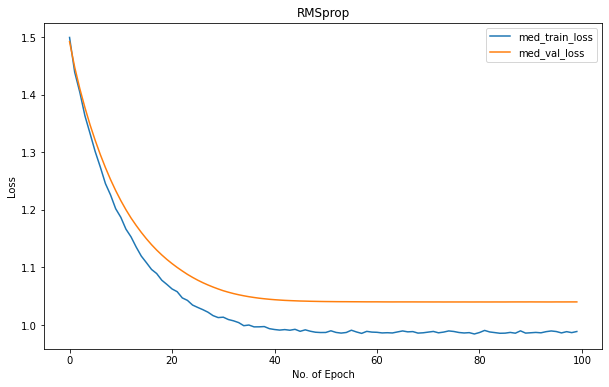

In [178]:
plt.figure(figsize = (10, 6))
plt.plot(med_train_loss_rmsprop)
plt.plot(med_val_loss_rmsprop)
plt.legend(["med_train_loss", "med_val_loss"])
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("RMSprop")
plt.show()

### OBSERVATION :
#### We see that between all the above 4 optimizers, Adam has the highest convergence rate, as the loss obtains the minima the fastest in case of Adam. 

# Final Observation:

## ADAM IS THE BEST OPTIMIZER FOR ALL THE 3 CASES.

#### THE DATAFRAME CONTAINING THE TRAIN AND TEST r2 SCORES FOR TRACT WISE DATA :

In [179]:
tr_sco = [train_score_low, train_score_med, train_score_high]
te_sco = [test_score_low, test_score_med, test_score_high]

In [180]:
df = pd.DataFrame([tr_sco, te_sco])
df = df.T
df.columns = ["Train", "Test"]
df.index = ["Low", "Medium", "High"]
df

,Train,Test
Low,0.737725,0.662354
Medium,0.560909,0.556355
High,0.790791,0.578559


In [181]:
#### THE END ####